In [1]:
!pip install POT

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.0/823.0 kB 9.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import gdown
import gensim.downloader as api
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances, manhattan_distances
from scipy.spatial.distance import jaccard, dice, hamming
from scipy.stats import pearsonr, entropy
from sklearn.cluster import KMeans
from gensim.corpora import Dictionary
from gensim.similarities import WmdSimilarity
from gensim.models import KeyedVectors
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

url = "https://drive.google.com/file/d/1y9qBtV71aY6OtEnhfQAxMTWXBBmdv63i/view?usp=drive_link"
output = "dataset.csv"
gdown.download(url, output, quiet=False, fuzzy=True)

dataset = pd.read_csv("dataset.csv")

Downloading...
From: https://drive.google.com/uc?id=1y9qBtV71aY6OtEnhfQAxMTWXBBmdv63i
To: /content/dataset.csv
100%|██████████| 93.0M/93.0M [00:00<00:00, 267MB/s]


In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# import dataset

In [4]:
dataset

,id_pekerjaan,id_perusahaan,skill,job title,jenis_pekerjaan,registration_type,category sponsor,city,state,county,deskripsi_keterampilan_final
0,3690843087,6049228,Accounting/Auditing,real estate staff accountant,Full-time,ComplexOnsiteApply,not sponsored,norwood,massachusetts,united states,job description staff accountant responsible t...
1,3691775263,2641066,Management,maintenance technician,Full-time,ComplexOnsiteApply,not sponsored,westmont,illinois,united states,job summary maintenance technician responsibil...
2,3691786992,82684341,Health Care Provider,optometrist,Part-time,ComplexOnsiteApply,not sponsored,milwaukee,wisconsin,united states,optometrist opening milwaukee wi full time par...
3,3691789797,82296828,Management,commercial drivers license commercial truck dr...,Temporary,ComplexOnsiteApply,not sponsored,elgin,texas,united states,temporary hire position need estimated month e...
4,3691792844,86746333,Engineering,senior electrical engineer,Full-time,ComplexOnsiteApply,not sponsored,old fort,north carolina,united states,senior electrical engineer system integrator e...
...,...,...,...,...,...,...,...,...,...,...,...
31551,3757720281,7428,Other,studio coach support north canton ohio,Part-time,OffsiteApply,not sponsored,cleveland,ohio,united states,ww look candidate help change people live glob...
31552,3757486249,15862365,Consulting,remote risk control manager multinational fina...,Full-time,ComplexOnsiteApply,not sponsored,boston,massachusetts,united states,seek analytical detail orient risk control man...
31553,3757780487,28647688,Health Care Provider,travel register nurse medsurg tele job availab...,Contract,OffsiteApply,not sponsored,gainesville,florida,united states,call get connect recruiter medical rat travel ...
31554,3757934256,213591,Design,additional design strategy writing project man...,Full-time,OffsiteApply,sponsored,portland,oregon,united states,program partner world competitive innovative b...


In [5]:
pd.set_option("display.max_colwidth",None)

# vektorisasis vecrorizer

In [6]:
input_text = "job description staff accountant responsible timely accurate preparation financial statement variance report balance sheet reconciliation assigned property assist account group general journal entry bank reconciliation weekly cash reporting special project responsibility include limit prepare monthly financial statement portfolio property produce variance report base analyzed result maintain schedule support balance sheet account include mortgage statement reconciliation capital schedule bank reconciliation submit vp account review prepare post adjust journal entry general ledger review income expense capital purchase accurate coding payment perform bank reconciliation maintain fixed asset track system prepare post bank deposit assist cash management department daily reporting requirement provide additional financial statement general ledger analysis needed participate project business need warrant qualification strong computer skill especially proficient excel ability communicate effectively professionally must possess strong time management analytical interpersonal skill year direct work accounting finance require app folio one site experience plus job type full time k k matching dental insurance disability insurance employee assistance program flexible schedule flexible spending account health insurance life insurance paid time off parental leave professional development assistance tuition reimbursement physical setting office schedule monday friday supplemental pay type bonus pay ability commute relocate norwood reliably commute planning relocate start work require experience gaap year prefer license certification cpa prefer work location one location"

In [ ]:
input_text = input_text.lower()
input_text = re.sub(r'[^\w\s]', '', input_text)
tokens = word_tokenize(input_text)
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words]
lemmatizer = WordNetLemmatizer()
tokens = [lemmatizer.lemmatize(word) for word in tokens]
input_text = ' '.join(tokens)

In [7]:
corpus = dataset["deskripsi_keterampilan_final"].tolist() + [input_text]

In [8]:
vectorizer = CountVectorizer()
count_matrix = vectorizer.fit_transform(corpus)

### Cosine_similarity

In [9]:
cosine_similarities = cosine_similarity(count_matrix[-1], count_matrix[:-1])

In [10]:
dataset["cosine_similarity"] = cosine_similarities.flatten()

### Euclidean Distance

In [11]:
euclidean_dist = euclidean_distances(count_matrix[-1], count_matrix[:-1])

In [12]:
dataset["euclidean_distance"] = euclidean_dist.flatten()

### Manhattan distance

In [13]:
manhattan_dist = manhattan_distances(count_matrix[-1], count_matrix[:-1])

In [14]:
dataset["manhattan_distance"] = manhattan_dist.flatten()

### jaccard_similarity

In [15]:
def jaccard_similarity(s1, s2):
    s1 = set(s1.split())
    s2 = set(s2.split())
    return len(s1 & s2) / len(s1 | s2)

In [16]:
dataset["jaccard_similarity"] = dataset["deskripsi_keterampilan_final"].apply(lambda x: jaccard_similarity(x, input_text))

### dice_coefficient

In [17]:
def dice_coefficient(s1, s2):
    s1 = set(s1.split())
    s2 = set(s2.split())
    return 2 * len(s1 & s2) / (len(s1) + len(s2))

In [18]:
dataset["dice_coefficient"] = dataset["deskripsi_keterampilan_final"].apply(lambda x: dice_coefficient(x, input_text))

### Pearson Correlation Coefficient

In [19]:
def pearson_corr(x, y):
    return pearsonr(x.toarray().flatten(), y.toarray().flatten())[0]

In [20]:
pearson_corrs = [pearson_corr(count_matrix[i], count_matrix[-1]) for i in range(len(corpus) - 1)]

In [21]:
dataset["pearson_correlation"] = pearson_corrs

### Word Mover's Distance (WMD)

In [22]:
model = api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [23]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)
    return text

In [24]:
def wmd_distance(s1, s2):
    s1 = clean_text(s1)
    s2 = clean_text(s2)

    s1_words = s1.split()
    s2_words = s2.split()

    s1_words = [word for word in s1_words if word in model]
    s2_words = [word for word in s2_words if word in model]

    if not s1_words or not s2_words:
        return float('inf')

    return model.wmdistance(s1_words, s2_words)

In [25]:
dataset["wmd_distance"] = dataset["deskripsi_keterampilan_final"].apply(lambda x: wmd_distance(x, input_text))

### bhattacharyya_distance

In [26]:
def bhattacharyya_distance(p, q):
    return -np.log(np.sum(np.sqrt(p * q)))

In [27]:
def bhattacharyya_distance_from_vector(x, y):
    p = x / np.sum(x)
    q = y / np.sum(y)
    return bhattacharyya_distance(p, q)

In [28]:
bhattacharyya_distances = [bhattacharyya_distance_from_vector(count_matrix[i].toarray().flatten(), count_matrix[-1].toarray().flatten()) for i in range(len(corpus) - 1)]
dataset["bhattacharyya_distance"] = bhattacharyya_distances

<ipython-input-26-b81c5a0608d2>:2: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.sum(np.sqrt(p * q)))


### Kullback-Leibler Divergence

In [29]:
def kl_divergence_from_vector(p, q):
    epsilon = 1e-10
    p = p + epsilon
    q = q + epsilon
    p = p / np.sum(p)
    q = q / np.sum(q)
    return entropy(p, q)

In [30]:
kl_divergences = [kl_divergence_from_vector(count_matrix[i].toarray().flatten(), count_matrix[-1].toarray().flatten()) for i in range(len(corpus) - 1)]

In [31]:
dataset["kl_divergence"] = kl_divergences

## Tampilkan hasil

### Hasil berdasarkan nilai cosine_similarity

semakin mendekati 1 makin mirip

In [32]:
top_similar = dataset.sort_values(by='cosine_similarity', ascending=False).head(10)
top_similar

id_pekerjaan  id_perusahaan                skill  \
0        3690843087        6049228  Accounting/Auditing   
865      3674585247       54819446  Accounting/Auditing   
41       3696373506       79378951  Accounting/Auditing   
122      3690876465         104849           Management   
10087    3699082700       35504188  Accounting/Auditing   
5474     3693599611        2762306  Accounting/Auditing   
13494    3701318075           1681  Accounting/Auditing   
6827     3697358549          95985  Accounting/Auditing   
24190    3749357184        1286891  Accounting/Auditing   
4892     3693587409        1286891  Accounting/Auditing   

                                      job title jenis_pekerjaan  \
0                  real estate staff accountant       Full-time   
865                                  accountant       Full-time   
41                             staff accountant       Full-time   
122                            director finance       Full-time   
10087             director corporate accounting       Full-time   
5474                           staff accountant       Full-time   
13494  snr accountant plant accountant rockford       Full-time   
6827                           staff accountant       Full-time   
24190                                accountant        Contract   
4892                    senior staff accountant       Full-time   

        registration_type category sponsor           city          state  \
0      ComplexOnsiteApply    not sponsored        norwood  massachusetts   
865    ComplexOnsiteApply    not sponsored       anniston        alabama   
41     ComplexOnsiteApply    not sponsored   gaithersburg       maryland   
122    ComplexOnsiteApply    not sponsored          omaha       nebraska   
10087  ComplexOnsiteApply        sponsored         irving          texas   
5474   ComplexOnsiteApply    not sponsored  newport beach     california   
13494  ComplexOnsiteApply    not sponsored       rockford       illinois   
6827         OffsiteApply        sponsored   falls church       virginia   
24190        OffsiteApply    not sponsored       san jose     california   
4892         OffsiteApply        sponsored         irving          texas   

              county  \
0      united states   
865    united states   
41     united states   
122    united states   
10087  united states   
5474   united states   
13494  united states   
6827   united states   
24190  united states   
4892   united states   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

### Hasil berdasarkan nilai euclidean_distance
mendekati 0 semakin baik

In [33]:
top_similar = dataset.sort_values(by='euclidean_distance', ascending=True).head(10)
top_similar

,id_pekerjaan,id_perusahaan,skill,job title,jenis_pekerjaan,registration_type,category sponsor,city,state,county,deskripsi_keterampilan_final,cosine_similarity,euclidean_distance,manhattan_distance,jaccard_similarity,dice_coefficient,pearson_correlation,wmd_distance,bhattacharyya_distance,kl_divergence
0,3690843087,6049228,Accounting/Auditing,real estate staff accountant,Full-time,ComplexOnsiteApply,not sponsored,norwood,massachusetts,united states,job description staff accountant responsible timely accurate preparation financial statement variance report balance sheet reconciliation assigned property assist account group general journal entry bank reconciliation weekly cash reporting special project responsibility include limit prepare monthly financial statement portfolio property produce variance report base analyzed result maintain schedule support balance sheet account include mortgage statement reconciliation capital schedule bank reconciliation submit vp account review prepare post adjust journal entry general ledger review income expense capital purchase accurate coding payment perform bank reconciliation maintain fixed asset track system prepare post bank deposit assist cash management department daily reporting requirement provide additional financial statement general ledger analysis needed participate project business need warrant qualification strong computer skill especially proficient excel ability communicate effectively professionally must possess strong time management analytical interpersonal skill year direct work accounting finance require app folio one site experience plus job type full time k k matching dental insurance disability insurance employee assistance program flexible schedule flexible spending account health insurance life insurance paid time off parental leave professional development assistance tuition reimbursement physical setting office schedule monday friday supplemental pay type bonus pay ability commute relocate norwood reliably commute planning relocate start work require experience gaap year prefer license certification cpa prefer work location one location,1.000000,0.000000,0.0,1.000000,1.000000,1.000000,0.000000,-0.000000,0.000000
865,3674585247,54819446,Accounting/Auditing,accountant,Full-time,ComplexOnsiteApply,not sponsored,anniston,alabama,united states,report plant controller accountant responsible general finance function position also serve adviser assigned position within department additional responsibility include ability maintain confidentiality ability work detailed information error easily detect maintain financial report record general ledger account prepare journal entry analysis account reconciliation bank account update post entry reconcile general ledger account sub ledger account requested contributing development review annual operate budget performance projection maintain documentation ap ar conduct internal audit perform monthly balance sheet reconciliation meeting processing reporting deadline respond information request review financial statement assist audit ensure compliance gaap assist plant controller need timely escalation problematic account appropriate management qualification bachelor degree accounting finance require year finance experience plus excellent communication skill write verbal work knowledge gaap strong numeracy analytical skill good problem solve time management skill highly organize detail orient willing adjust departmental workload change ability work efficiently multitask reconciliation assist monthly close process,0.530149,17.549929,220.0,0.227053,0.370079,0.529050,0.750227,0.778280,11.276144
13905,3701322692,106083,Accounting/Auditing,accounting manager assistant controller,Full-time,ComplexOnsiteApply,sponsored,new york,new york,united states,prepare monthly financial closing assist budget assist month end account reconciliation balance sheet income statement account reconciliation maintain general ledger chart account reconcile ban

### Hasil berdasarkan manhattan_distance
semakin ke 0 semakin baik

In [34]:
top_similar = dataset.sort_values(by='manhattan_distance', ascending=True).head(10)
top_similar

,id_pekerjaan,id_perusahaan,skill,job title,jenis_pekerjaan,registration_type,category sponsor,city,state,county,deskripsi_keterampilan_final,cosine_similarity,euclidean_distance,manhattan_distance,jaccard_similarity,dice_coefficient,pearson_correlation,wmd_distance,bhattacharyya_distance,kl_divergence
0,3690843087,6049228,Accounting/Auditing,real estate staff accountant,Full-time,ComplexOnsiteApply,not sponsored,norwood,massachusetts,united states,job description staff accountant responsible timely accurate preparation financial statement variance report balance sheet reconciliation assigned property assist account group general journal entry bank reconciliation weekly cash reporting special project responsibility include limit prepare monthly financial statement portfolio property produce variance report base analyzed result maintain schedule support balance sheet account include mortgage statement reconciliation capital schedule bank reconciliation submit vp account review prepare post adjust journal entry general ledger review income expense capital purchase accurate coding payment perform bank reconciliation maintain fixed asset track system prepare post bank deposit assist cash management department daily reporting requirement provide additional financial statement general ledger analysis needed participate project business need warrant qualification strong computer skill especially proficient excel ability communicate effectively professionally must possess strong time management analytical interpersonal skill year direct work accounting finance require app folio one site experience plus job type full time k k matching dental insurance disability insurance employee assistance program flexible schedule flexible spending account health insurance life insurance paid time off parental leave professional development assistance tuition reimbursement physical setting office schedule monday friday supplemental pay type bonus pay ability commute relocate norwood reliably commute planning relocate start work require experience gaap year prefer license certification cpa prefer work location one location,1.000000,0.000000,0.0,1.000000,1.000000,1.000000,0.000000,-0.000000,0.000000
13905,3701322692,106083,Accounting/Auditing,accounting manager assistant controller,Full-time,ComplexOnsiteApply,sponsored,new york,new york,united states,prepare monthly financial closing assist budget assist month end account reconciliation balance sheet income statement account reconciliation maintain general ledger chart account reconcile bank account include inventory factor statement analyze exist operation recommend implement new system must experience quick books,0.447783,17.606817,198.0,0.113208,0.203390,0.447186,0.924401,1.052940,10.547839
29878,3756117095,756229,Accounting/Auditing,senior accountant,Full-time,OffsiteApply,not sponsored,roseville,california,united states,senior accountant year experience,0.127247,19.493589,204.0,0.020833,0.040816,0.126910,1.254245,2.014631,9.351464
22084,3757739605,89369,Information Technology,journeyman computer user support specialist,Full-time,OffsiteApply,not sponsored,omaha,nebraska,united states,job description education skill training experience,0.145455,19.442222,204.0,0.027586,0.053691,0.145031,1.211738,1.902992,10.864821
4337,3693581957,1286891,Accounting/Auditing,accountant bookkeeper,Full-time,OffsiteApply,sponsored,salisbury,maryland,united states,job description essential duty responsibility perform daily duty assign management duty shall include use po software lightspeed account reconciliation deposit disbursement provide system administrative support need sale rental finance preparation monthly financial report fully integrate system process payroll tax payment tax filing inventory control management experience requirement year minimum related work experience account full charge bookkeeping excellent computer skill include proficiency microsoft office application strong analytical skill ability p

### Hasil berdasarkan jaccard_similarity

makin mendekati 1 makin mirip

In [35]:
top_similar = dataset.sort_values(by='jaccard_similarity', ascending=False).head(10)
top_similar

,id_pekerjaan,id_perusahaan,skill,job title,jenis_pekerjaan,registration_type,category sponsor,city,state,county,deskripsi_keterampilan_final,cosine_similarity,euclidean_distance,manhattan_distance,jaccard_similarity,dice_coefficient,pearson_correlation,wmd_distance,bhattacharyya_distance,kl_divergence
0,3690843087,6049228,Accounting/Auditing,real estate staff accountant,Full-time,ComplexOnsiteApply,not sponsored,norwood,massachusetts,united states,job description staff accountant responsible timely accurate preparation financial statement variance report balance sheet reconciliation assigned property assist account group general journal entry bank reconciliation weekly cash reporting special project responsibility include limit prepare monthly financial statement portfolio property produce variance report base analyzed result maintain schedule support balance sheet account include mortgage statement reconciliation capital schedule bank reconciliation submit vp account review prepare post adjust journal entry general ledger review income expense capital purchase accurate coding payment perform bank reconciliation maintain fixed asset track system prepare post bank deposit assist cash management department daily reporting requirement provide additional financial statement general ledger analysis needed participate project business need warrant qualification strong computer skill especially proficient excel ability communicate effectively professionally must possess strong time management analytical interpersonal skill year direct work accounting finance require app folio one site experience plus job type full time k k matching dental insurance disability insurance employee assistance program flexible schedule flexible spending account health insurance life insurance paid time off parental leave professional development assistance tuition reimbursement physical setting office schedule monday friday supplemental pay type bonus pay ability commute relocate norwood reliably commute planning relocate start work require experience gaap year prefer license certification cpa prefer work location one location,1.000000,0.000000,0.0,1.000000,1.000000,1.000000,0.000000,-0.000000,0.000000
122,3690876465,104849,Management,director finance,Full-time,ComplexOnsiteApply,not sponsored,omaha,nebraska,united states,ready help shape future travel hospitality coral tree seek director finance join team magnolia omaha director finance provide daily management general ledger position within accounting department include payroll income audit staff accountant responsibility reconciliation integrity general ledger addition assist preparation accurate timely financial reporting routinely provide financial support analysis leadership across resort responsibility manage daily operation work schedule income audit payroll general ledger supervise performance accounting manager monitor daily operational flash report accuracy completeness manager coordination internal external audit evaluate result institute procedure control relate finding maintain general ledger account process month end closing check list checklist attach monthly due date produce financial statement due date monthly review bank reconciliation monthly distribute due date submit monthly tax reports prepare balance sheet reconciliation monthly track permit license property maintain copy contract trade share drive maintain cash balance bank account distribute weekly cash cash need report additional duty project assigned qualification bachelor degree accounting cpa preferred hospitality background prefer minimum year audit experience mid large size public accounting firm previous supervisory experience preferred excellent communication skill write oral proficiency computer system include report writing excel power point able commute property site role valued member coral tree team receive comprehensive benefit package include group medical dental vision life disability benefit participation pre ta

### Hasil berdasarkan dice_coefficient

makin mendekati 1 makin mirip

In [36]:
top_similar = dataset.sort_values(by='dice_coefficient', ascending=False).head(10)
top_similar

,id_pekerjaan,id_perusahaan,skill,job title,jenis_pekerjaan,registration_type,category sponsor,city,state,county,deskripsi_keterampilan_final,cosine_similarity,euclidean_distance,manhattan_distance,jaccard_similarity,dice_coefficient,pearson_correlation,wmd_distance,bhattacharyya_distance,kl_divergence
0,3690843087,6049228,Accounting/Auditing,real estate staff accountant,Full-time,ComplexOnsiteApply,not sponsored,norwood,massachusetts,united states,job description staff accountant responsible timely accurate preparation financial statement variance report balance sheet reconciliation assigned property assist account group general journal entry bank reconciliation weekly cash reporting special project responsibility include limit prepare monthly financial statement portfolio property produce variance report base analyzed result maintain schedule support balance sheet account include mortgage statement reconciliation capital schedule bank reconciliation submit vp account review prepare post adjust journal entry general ledger review income expense capital purchase accurate coding payment perform bank reconciliation maintain fixed asset track system prepare post bank deposit assist cash management department daily reporting requirement provide additional financial statement general ledger analysis needed participate project business need warrant qualification strong computer skill especially proficient excel ability communicate effectively professionally must possess strong time management analytical interpersonal skill year direct work accounting finance require app folio one site experience plus job type full time k k matching dental insurance disability insurance employee assistance program flexible schedule flexible spending account health insurance life insurance paid time off parental leave professional development assistance tuition reimbursement physical setting office schedule monday friday supplemental pay type bonus pay ability commute relocate norwood reliably commute planning relocate start work require experience gaap year prefer license certification cpa prefer work location one location,1.000000,0.000000,0.0,1.000000,1.000000,1.000000,0.000000,-0.000000,0.000000
122,3690876465,104849,Management,director finance,Full-time,ComplexOnsiteApply,not sponsored,omaha,nebraska,united states,ready help shape future travel hospitality coral tree seek director finance join team magnolia omaha director finance provide daily management general ledger position within accounting department include payroll income audit staff accountant responsibility reconciliation integrity general ledger addition assist preparation accurate timely financial reporting routinely provide financial support analysis leadership across resort responsibility manage daily operation work schedule income audit payroll general ledger supervise performance accounting manager monitor daily operational flash report accuracy completeness manager coordination internal external audit evaluate result institute procedure control relate finding maintain general ledger account process month end closing check list checklist attach monthly due date produce financial statement due date monthly review bank reconciliation monthly distribute due date submit monthly tax reports prepare balance sheet reconciliation monthly track permit license property maintain copy contract trade share drive maintain cash balance bank account distribute weekly cash cash need report additional duty project assigned qualification bachelor degree accounting cpa preferred hospitality background prefer minimum year audit experience mid large size public accounting firm previous supervisory experience preferred excellent communication skill write oral proficiency computer system include report writing excel power point able commute property site role valued member coral tree team receive comprehensive benefit package include group medical dental vision life disability benefit participation pre ta

### Hasil berdasarkan pearson_correlation

Hasil semakin mendekati 1 semakin mirip

In [37]:
top_similar = dataset.sort_values(by='pearson_correlation', ascending=False).head(10)
top_similar

id_pekerjaan  id_perusahaan                skill  \
0        3690843087        6049228  Accounting/Auditing   
865      3674585247       54819446  Accounting/Auditing   
41       3696373506       79378951  Accounting/Auditing   
122      3690876465         104849           Management   
10087    3699082700       35504188  Accounting/Auditing   
5474     3693599611        2762306  Accounting/Auditing   
13494    3701318075           1681  Accounting/Auditing   
6827     3697358549          95985  Accounting/Auditing   
24190    3749357184        1286891  Accounting/Auditing   
4892     3693587409        1286891  Accounting/Auditing   

                                      job title jenis_pekerjaan  \
0                  real estate staff accountant       Full-time   
865                                  accountant       Full-time   
41                             staff accountant       Full-time   
122                            director finance       Full-time   
10087             director corporate accounting       Full-time   
5474                           staff accountant       Full-time   
13494  snr accountant plant accountant rockford       Full-time   
6827                           staff accountant       Full-time   
24190                                accountant        Contract   
4892                    senior staff accountant       Full-time   

        registration_type category sponsor           city          state  \
0      ComplexOnsiteApply    not sponsored        norwood  massachusetts   
865    ComplexOnsiteApply    not sponsored       anniston        alabama   
41     ComplexOnsiteApply    not sponsored   gaithersburg       maryland   
122    ComplexOnsiteApply    not sponsored          omaha       nebraska   
10087  ComplexOnsiteApply        sponsored         irving          texas   
5474   ComplexOnsiteApply    not sponsored  newport beach     california   
13494  ComplexOnsiteApply    not sponsored       rockford       illinois   
6827         OffsiteApply        sponsored   falls church       virginia   
24190        OffsiteApply    not sponsored       san jose     california   
4892         OffsiteApply        sponsored         irving          texas   

              county  \
0      united states   
865    united states   
41     united states   
122    united states   
10087  united states   
5474   united states   
13494  united states   
6827   united states   
24190  united states   
4892   united states   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

### Hasil berdasarkan nilai WMD

Hasil mendekati 0 semakin mirip

In [38]:
filtered_dataset = dataset[dataset["wmd_distance"] != float('inf')]
top_similar = filtered_dataset.sort_values(by='wmd_distance', ascending=True).head(10)
top_similar

,id_pekerjaan,id_perusahaan,skill,job title,jenis_pekerjaan,registration_type,category sponsor,city,state,county,deskripsi_keterampilan_final,cosine_similarity,euclidean_distance,manhattan_distance,jaccard_similarity,dice_coefficient,pearson_correlation,wmd_distance,bhattacharyya_distance,kl_divergence
0,3690843087,6049228,Accounting/Auditing,real estate staff accountant,Full-time,ComplexOnsiteApply,not sponsored,norwood,massachusetts,united states,job description staff accountant responsible timely accurate preparation financial statement variance report balance sheet reconciliation assigned property assist account group general journal entry bank reconciliation weekly cash reporting special project responsibility include limit prepare monthly financial statement portfolio property produce variance report base analyzed result maintain schedule support balance sheet account include mortgage statement reconciliation capital schedule bank reconciliation submit vp account review prepare post adjust journal entry general ledger review income expense capital purchase accurate coding payment perform bank reconciliation maintain fixed asset track system prepare post bank deposit assist cash management department daily reporting requirement provide additional financial statement general ledger analysis needed participate project business need warrant qualification strong computer skill especially proficient excel ability communicate effectively professionally must possess strong time management analytical interpersonal skill year direct work accounting finance require app folio one site experience plus job type full time k k matching dental insurance disability insurance employee assistance program flexible schedule flexible spending account health insurance life insurance paid time off parental leave professional development assistance tuition reimbursement physical setting office schedule monday friday supplemental pay type bonus pay ability commute relocate norwood reliably commute planning relocate start work require experience gaap year prefer license certification cpa prefer work location one location,1.000000,0.000000,0.0,1.000000,1.000000,1.000000,0.000000,-0.000000,0.000000
122,3690876465,104849,Management,director finance,Full-time,ComplexOnsiteApply,not sponsored,omaha,nebraska,united states,ready help shape future travel hospitality coral tree seek director finance join team magnolia omaha director finance provide daily management general ledger position within accounting department include payroll income audit staff accountant responsibility reconciliation integrity general ledger addition assist preparation accurate timely financial reporting routinely provide financial support analysis leadership across resort responsibility manage daily operation work schedule income audit payroll general ledger supervise performance accounting manager monitor daily operational flash report accuracy completeness manager coordination internal external audit evaluate result institute procedure control relate finding maintain general ledger account process month end closing check list checklist attach monthly due date produce financial statement due date monthly review bank reconciliation monthly distribute due date submit monthly tax reports prepare balance sheet reconciliation monthly track permit license property maintain copy contract trade share drive maintain cash balance bank account distribute weekly cash cash need report additional duty project assigned qualification bachelor degree accounting cpa preferred hospitality background prefer minimum year audit experience mid large size public accounting firm previous supervisory experience preferred excellent communication skill write oral proficiency computer system include report writing excel power point able commute property site role valued member coral tree team receive comprehensive benefit package include group medical dental vision life disability benefit participation pre ta

### Hasil berdasarkan nilai bhattacharyya_distance

Bhattacharyya distance = 0: Kedua teks sangat mirip

Bhattacharyya distance > 0: Semakin besar nilainya, semakin tidak mirip kedua teks tersebut

In [39]:
top_similar = dataset.sort_values(by='bhattacharyya_distance', ascending=True).head(10)
top_similar

id_pekerjaan  id_perusahaan                skill  \
0        3690843087        6049228  Accounting/Auditing   
122      3690876465         104849           Management   
13494    3701318075           1681  Accounting/Auditing   
865      3674585247       54819446  Accounting/Auditing   
13059    3701313246           7454                Legal   
41       3696373506       79378951  Accounting/Auditing   
10087    3699082700       35504188  Accounting/Auditing   
5005     3693588194           1681  Accounting/Auditing   
5474     3693599611        2762306  Accounting/Auditing   
23643    3757492043         286607  Accounting/Auditing   

                                                         job title  \
0                                     real estate staff accountant   
122                                               director finance   
13494                     snr accountant plant accountant rockford   
865                                                     accountant   
13059                                      senior staff accountant   
41                                                staff accountant   
10087                                director corporate accounting   
5005   senior accountant manufacturing glendale hts primarily site   
5474                                              staff accountant   
23643                                            senior accountant   

      jenis_pekerjaan   registration_type category sponsor              city  \
0           Full-time  ComplexOnsiteApply    not sponsored           norwood   
122         Full-time  ComplexOnsiteApply    not sponsored             omaha   
13494       Full-time  ComplexOnsiteApply    not sponsored          rockford   
865         Full-time  ComplexOnsiteApply    not sponsored          anniston   
13059       Full-time  ComplexOnsiteApply        sponsored          new york   
41          Full-time  ComplexOnsiteApply    not sponsored      gaithersburg   
10087       Full-time  ComplexOnsiteApply        sponsored            irving   
5005        Full-time  ComplexOnsiteApply        sponsored  glendale heights   
5474        Full-time  ComplexOnsiteApply    not sponsored     newport beach   
23643       Full-time        OffsiteApply    not sponsored            denver   

               state         county  \
0      massachusetts  united states   
122         nebraska  united states   
13494       illinois  united states   
865          alabama  united states   
13059       new york  united states   
41          maryland  united states   
10087          texas  united states   
5005        illinois  united states   
5474      california  united states   
23643       colorado  united states   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

### Hasil berdasarkan nilai Kullback-Leibler Divergence

mendekati 0 semakin mirip, menjauhi 0 semakin berbeda

In [40]:
filtered_dataset = dataset[dataset["kl_divergence"] != float('inf')]
top_similar = filtered_dataset.sort_values(by='kl_divergence', ascending=True).head(10)
top_similar

,id_pekerjaan,id_perusahaan,skill,job title,jenis_pekerjaan,registration_type,category sponsor,city,state,county,deskripsi_keterampilan_final,cosine_similarity,euclidean_distance,manhattan_distance,jaccard_similarity,dice_coefficient,pearson_correlation,wmd_distance,bhattacharyya_distance,kl_divergence
0,3690843087,6049228,Accounting/Auditing,real estate staff accountant,Full-time,ComplexOnsiteApply,not sponsored,norwood,massachusetts,united states,job description staff accountant responsible timely accurate preparation financial statement variance report balance sheet reconciliation assigned property assist account group general journal entry bank reconciliation weekly cash reporting special project responsibility include limit prepare monthly financial statement portfolio property produce variance report base analyzed result maintain schedule support balance sheet account include mortgage statement reconciliation capital schedule bank reconciliation submit vp account review prepare post adjust journal entry general ledger review income expense capital purchase accurate coding payment perform bank reconciliation maintain fixed asset track system prepare post bank deposit assist cash management department daily reporting requirement provide additional financial statement general ledger analysis needed participate project business need warrant qualification strong computer skill especially proficient excel ability communicate effectively professionally must possess strong time management analytical interpersonal skill year direct work accounting finance require app folio one site experience plus job type full time k k matching dental insurance disability insurance employee assistance program flexible schedule flexible spending account health insurance life insurance paid time off parental leave professional development assistance tuition reimbursement physical setting office schedule monday friday supplemental pay type bonus pay ability commute relocate norwood reliably commute planning relocate start work require experience gaap year prefer license certification cpa prefer work location one location,1.000000,0.000000,0.0,1.000000,1.000000,1.000000,0.000000,-0.000000,0.000000
29878,3756117095,756229,Accounting/Auditing,senior accountant,Full-time,OffsiteApply,not sponsored,roseville,california,united states,senior accountant year experience,0.127247,19.493589,204.0,0.020833,0.040816,0.126910,1.254245,2.014631,9.351464
13905,3701322692,106083,Accounting/Auditing,accounting manager assistant controller,Full-time,ComplexOnsiteApply,sponsored,new york,new york,united states,prepare monthly financial closing assist budget assist month end account reconciliation balance sheet income statement account reconciliation maintain general ledger chart account reconcile bank account include inventory factor statement analyze exist operation recommend implement new system must experience quick books,0.447783,17.606817,198.0,0.113208,0.203390,0.447186,0.924401,1.052940,10.547839
22084,3757739605,89369,Information Technology,journeyman computer user support specialist,Full-time,OffsiteApply,not sponsored,omaha,nebraska,united states,job description education skill training experience,0.145455,19.442222,204.0,0.027586,0.053691,0.145031,1.211738,1.902992,10.864821
865,3674585247,54819446,Accounting/Auditing,accountant,Full-time,ComplexOnsiteApply,not sponsored,anniston,alabama,united states,report plant controller accountant responsible general finance function position also serve adviser assigned position within department additional responsibility include ability maintain confidentiality ability work detailed information error easily detect maintain financial report record general ledger account prepare journal entry analysis account reconciliation bank account update post entry reconcile general ledger account sub ledger account requested contributing development review annual operate budget performance projection maintain documentation ap ar 

### Visualisasi matriks top 10

In [41]:
top_cosine = dataset.sort_values(by='cosine_similarity', ascending=False).head(10)
top_euclidean = dataset.sort_values(by='euclidean_distance', ascending=True).head(10)
top_manhattan = dataset.sort_values(by='manhattan_distance', ascending=True).head(10)
top_jaccard = dataset.sort_values(by='jaccard_similarity', ascending=False).head(10)
top_dice = dataset.sort_values(by='dice_coefficient', ascending=False).head(10)
top_pearson = dataset.sort_values(by='pearson_correlation', ascending=False).head(10)
filtered_dataset_wmd = dataset[dataset["wmd_distance"] != float('inf')]
top_wmd = filtered_dataset_wmd.sort_values(by='wmd_distance', ascending=True).head(10)
top_bhattacharyya = dataset.sort_values(by='bhattacharyya_distance', ascending=True).head(10)
filtered_dataset_kl = dataset[dataset["kl_divergence"] != float('inf')]
top_kl = filtered_dataset_kl.sort_values(by='kl_divergence', ascending=True).head(10)

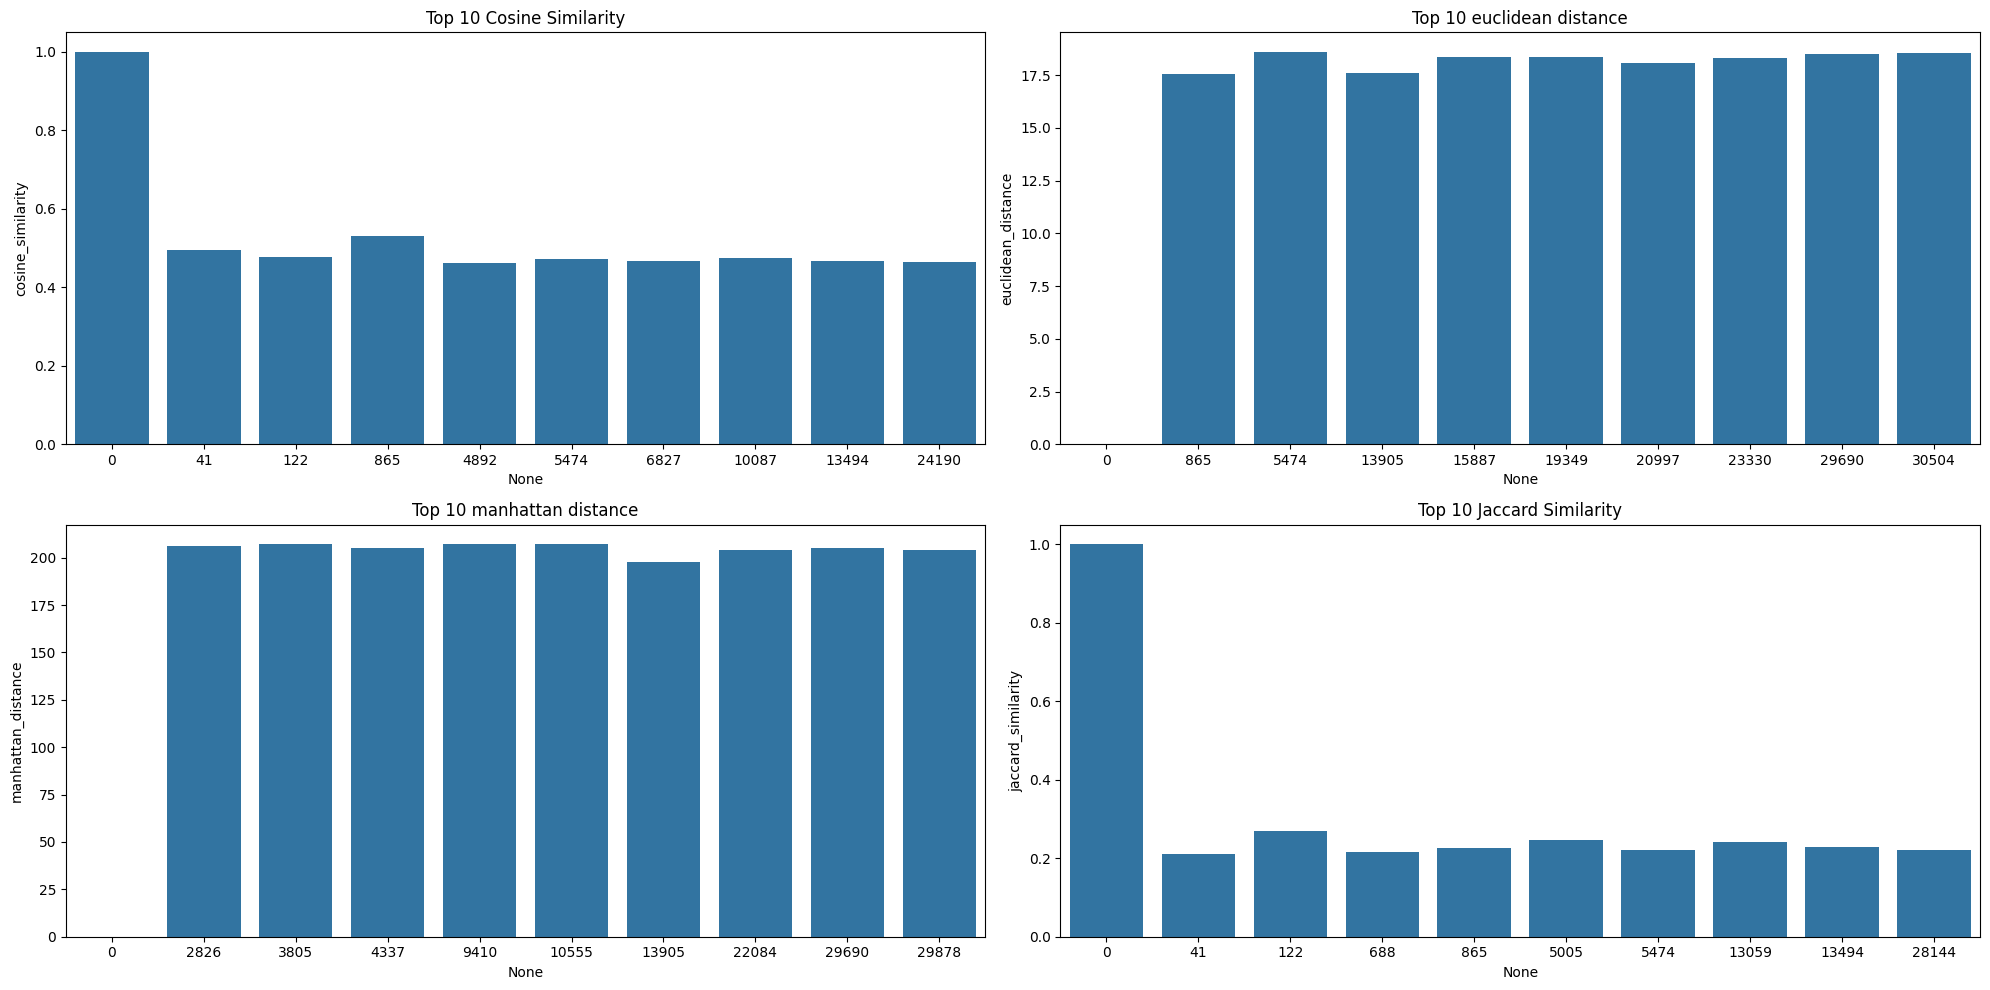

In [42]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

sns.barplot(ax=axes[0, 0], x=top_cosine.index, y=top_cosine["cosine_similarity"])
axes[0, 0].set_title("Top 10 Cosine Similarity")

sns.barplot(ax=axes[0, 1], x=top_euclidean.index, y=top_euclidean["euclidean_distance"])
axes[0, 1].set_title("Top 10 euclidean distance")

sns.barplot(ax=axes[1, 0], x=top_manhattan.index, y=top_manhattan["manhattan_distance"])
axes[1, 0].set_title("Top 10 manhattan distance")

sns.barplot(ax=axes[1, 1], x=top_jaccard.index, y=top_jaccard["jaccard_similarity"])
axes[1, 1].set_title("Top 10 Jaccard Similarity")

plt.tight_layout()
plt.show()

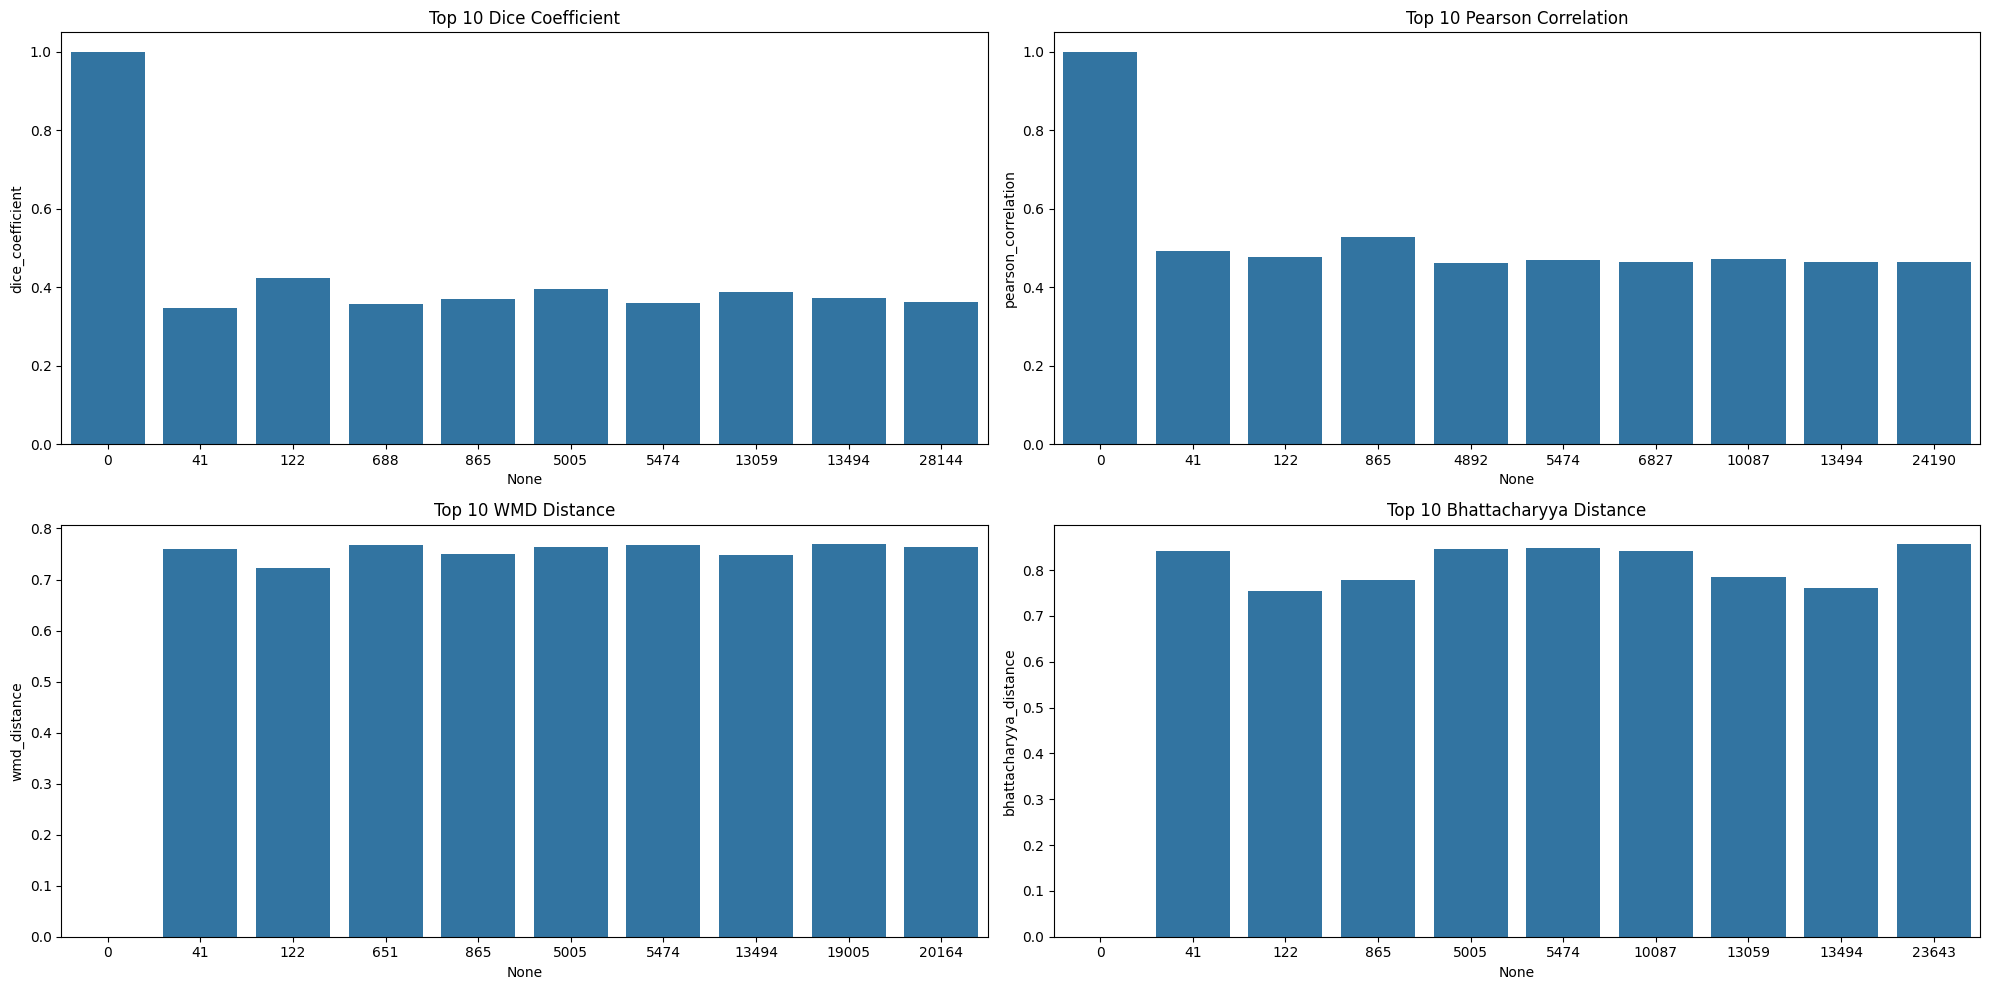

In [43]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

sns.barplot(ax=axes[0, 0], x=top_dice.index, y=top_dice["dice_coefficient"])
axes[0, 0].set_title("Top 10 Dice Coefficient")

sns.barplot(ax=axes[0, 1], x=top_pearson.index, y=top_pearson["pearson_correlation"])
axes[0, 1].set_title("Top 10 Pearson Correlation")

sns.barplot(ax=axes[1, 0], x=top_wmd.index, y=top_wmd["wmd_distance"])
axes[1, 0].set_title("Top 10 WMD Distance")

sns.barplot(ax=axes[1, 1], x=top_bhattacharyya.index, y=top_bhattacharyya["bhattacharyya_distance"])
axes[1, 1].set_title("Top 10 Bhattacharyya Distance")

plt.tight_layout()
plt.show()

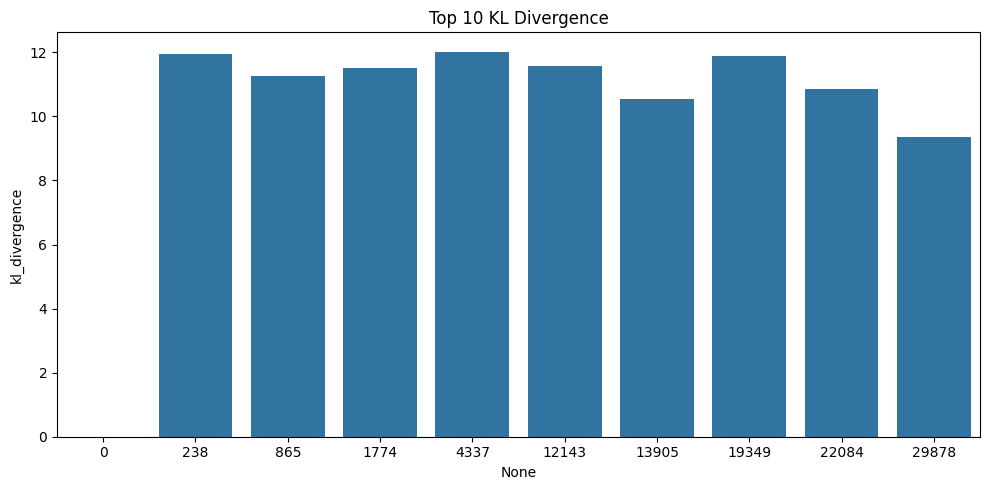

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

sns.barplot(ax=ax, x=top_kl.index, y=top_kl["kl_divergence"])
ax.set_title("Top 10 KL Divergence")

plt.tight_layout()
plt.show()

## contoh Test 2 dan kode bersih

In [45]:
input_text = "At the age of 28, I, John Smith, am an enthusiastic and highly skilled data analyst seeking to advance my career by applying for a position in the data field. With over five years of experience in data analysis and a proven track record of successfully implementing data-driven strategies, I have honed my expertise in various analytical tools and methodologies. I hold a Bachelor's degree in Computer Science from the University of California, Berkeley, and a Master's degree in Data Science from Stanford University. Throughout my career, I have demonstrated exceptional analytical capabilities, strong problem-solving skills, and a deep understanding of statistical models and machine learning algorithms. My passion for uncovering insights from complex datasets and my commitment to continuous learning make me a valuable candidate for any data-driven organization."

In [46]:
input_text = input_text.lower()

In [47]:
input_text = re.sub(r'[^\w\s]', '', input_text)

In [48]:
tokens = word_tokenize(input_text)

In [49]:
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words]

In [50]:
lemmatizer = WordNetLemmatizer()
tokens = [lemmatizer.lemmatize(word) for word in tokens]

In [51]:
input_text = ' '.join(tokens)

In [52]:
input_text

'age 28 john smith enthusiastic highly skilled data analyst seeking advance career applying position data field five year experience data analysis proven track record successfully implementing datadriven strategy honed expertise various analytical tool methodology hold bachelor degree computer science university california berkeley master degree data science stanford university throughout career demonstrated exceptional analytical capability strong problemsolving skill deep understanding statistical model machine learning algorithm passion uncovering insight complex datasets commitment continuous learning make valuable candidate datadriven organization'

In [53]:
corpus = dataset["deskripsi_keterampilan_final"].tolist() + [input_text]

In [54]:
vectorizer = CountVectorizer()
count_matrix = vectorizer.fit_transform(corpus)

In [55]:
cosine_similarities = cosine_similarity(count_matrix[-1], count_matrix[:-1])

In [56]:
dataset["cosine_similarity"] = cosine_similarities.flatten()

In [57]:
euclidean_dist = euclidean_distances(count_matrix[-1], count_matrix[:-1])

In [58]:
dataset["euclidean_distance"] = euclidean_dist.flatten()

In [59]:
manhattan_dist = manhattan_distances(count_matrix[-1], count_matrix[:-1])

In [60]:
dataset["manhattan_distance"] = manhattan_dist.flatten()

In [61]:
def jaccard_similarity(s1, s2):
    s1 = set(s1.split())
    s2 = set(s2.split())
    return len(s1 & s2) / len(s1 | s2)

In [62]:
dataset["jaccard_similarity"] = dataset["deskripsi_keterampilan_final"].apply(lambda x: jaccard_similarity(x, input_text))

In [63]:
def dice_coefficient(s1, s2):
    s1 = set(s1.split())
    s2 = set(s2.split())
    return 2 * len(s1 & s2) / (len(s1) + len(s2))

In [64]:
dataset["dice_coefficient"] = dataset["deskripsi_keterampilan_final"].apply(lambda x: dice_coefficient(x, input_text))

In [65]:
def pearson_corr(x, y):
    return pearsonr(x.toarray().flatten(), y.toarray().flatten())[0]

In [66]:
pearson_corrs = [pearson_corr(count_matrix[i], count_matrix[-1]) for i in range(len(corpus) - 1)]

In [67]:
dataset["pearson_correlation"] = pearson_corrs

tidak import model = api.load("word2vec-google-news-300") karena sudah sebelumnya

In [68]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)
    return text

In [69]:
def wmd_distance(s1, s2):
    s1 = clean_text(s1)
    s2 = clean_text(s2)

    s1_words = s1.split()
    s2_words = s2.split()

    s1_words = [word for word in s1_words if word in model]
    s2_words = [word for word in s2_words if word in model]

    if not s1_words or not s2_words:
        return float('inf')

    return model.wmdistance(s1_words, s2_words)

In [70]:
dataset["wmd_distance"] = dataset["deskripsi_keterampilan_final"].apply(lambda x: wmd_distance(x, input_text))

In [71]:
def bhattacharyya_distance(p, q):
    return -np.log(np.sum(np.sqrt(p * q)))

In [72]:
def bhattacharyya_distance_from_vector(x, y):
    p = x / np.sum(x)
    q = y / np.sum(y)
    return bhattacharyya_distance(p, q)

In [73]:
bhattacharyya_distances = [bhattacharyya_distance_from_vector(count_matrix[i].toarray().flatten(), count_matrix[-1].toarray().flatten()) for i in range(len(corpus) - 1)]
dataset["bhattacharyya_distance"] = bhattacharyya_distances

<ipython-input-71-b81c5a0608d2>:2: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.sum(np.sqrt(p * q)))


In [74]:
def kl_divergence_from_vector(p, q):
    epsilon = 1e-10
    p = p + epsilon
    q = q + epsilon
    p = p / np.sum(p)
    q = q / np.sum(q)
    return entropy(p, q)

In [75]:
kl_divergences = [kl_divergence_from_vector(count_matrix[i].toarray().flatten(), count_matrix[-1].toarray().flatten()) for i in range(len(corpus) - 1)]

In [76]:
dataset["kl_divergence"] = kl_divergences

### Berbagai hasil

In [77]:
top_similar = dataset.sort_values(by='cosine_similarity', ascending=False).head(10)
top_similar

id_pekerjaan  id_perusahaan                   skill  \
19252    3757450438         871133  Information Technology   
18373    3757469023       16198010                   Sales   
1784     3693049684       18581793      Project Management   
18313    3757436707         871133  Information Technology   
12592    3701305891         899433  Information Technology   
28174    3757903602          79098  Information Technology   
8853     3697394881          26067             Engineering   
4125     3693074204       18945668                   Other   
2043     3693050995          16388  Information Technology   
24388    3756115911       67887261  Information Technology   

                                               job title jenis_pekerjaan  \
19252                                     data scientist       Full-time   
18373    next generation data analyst site new york city       Full-time   
1784                                      senior manager       Full-time   
18313                                      data engineer       Full-time   
12592  senior manager data architecture data engineering       Full-time   
28174                            data warehouse engineer        Contract   
8853            analytics data solution architect stream       Full-time   
4125                                senior data engineer       Full-time   
2043                                        data analyst        Contract   
24388                            data integrity engineer        Contract   

        registration_type category sponsor                    city  \
19252  ComplexOnsiteApply    not sponsored                new york   
18373  ComplexOnsiteApply    not sponsored                new york   
1784   ComplexOnsiteApply        sponsored  san francisco bay area   
18313  ComplexOnsiteApply    not sponsored                new york   
12592  ComplexOnsiteApply    not sponsored            philadelphia   
28174   SimpleOnsiteApply    not sponsored                st louis   
8853         OffsiteApply    not sponsored              scottsdale   
4125   ComplexOnsiteApply        sponsored                 No Info   
2043   ComplexOnsiteApply    not sponsored             minneapolis   
24388  ComplexOnsiteApply    not sponsored                 houston   

              state         county  \
19252      new york  united states   
18373      new york  united states   
1784     california  united states   
18313      new york  united states   
12592  pennsylvania  united states   
28174      missouri  united states   
8853        arizona  united states   
4125        No Info  united states   
2043      minnesota  united states   
24388         texas  united states   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [78]:
top_similar['cosine_similarity']

19252    0.485444
18373    0.463007
1784     0.440409
18313    0.424580
12592    0.422747
28174    0.415807
8853     0.415538
4125     0.414957
2043     0.411368
24388    0.408892
Name: cosine_similarity, dtype: float64

In [79]:
top_similar = dataset.sort_values(by='euclidean_distance', ascending=True).head(10)
top_similar

,id_pekerjaan,id_perusahaan,skill,job title,jenis_pekerjaan,registration_type,category sponsor,city,state,county,deskripsi_keterampilan_final,cosine_similarity,euclidean_distance,manhattan_distance,jaccard_similarity,dice_coefficient,pearson_correlation,wmd_distance,bhattacharyya_distance,kl_divergence
2826,3693058243,1068662,Legal,associate attorney,Full-time,SimpleOnsiteApply,not sponsored,troy,michigan,united states,year fault experience necessary,0.098533,10.148892,77.0,0.028986,0.056338,0.098235,1.229115,2.171903,14.470424
29878,3756117095,756229,Accounting/Auditing,senior accountant,Full-time,OffsiteApply,not sponsored,roseville,california,united states,senior accountant year experience,0.098533,10.148892,77.0,0.028986,0.056338,0.098235,1.244217,2.171903,14.470424
10555,3699088610,4196994,Education,article teacher,Full-time,SimpleOnsiteApply,not sponsored,washington,district of columbia,united states,artist,0.000000,10.198039,78.0,0.000000,0.000000,-0.000186,1.371905,inf,27.369558
3805,3693070832,75156982,Human Resources,group facilitator,Other,SimpleOnsiteApply,not sponsored,denver,colorado,united states,facilitator,0.000000,10.198039,78.0,0.000000,0.000000,-0.000186,1.357242,inf,27.369558
4196,3693075405,1512,Sales,inbound stock team member,Part-time,ComplexOnsiteApply,not sponsored,scotts valley,california,united states,name,0.000000,10.198039,78.0,0.000000,0.000000,-0.000186,1.378572,inf,27.369558
13484,3694158424,96350264,Quality Assurance,linkedin test vacancy,Contract,OffsiteApply,not sponsored,kings park,new york,united states,testtesttesttesttesttesttesttesttesttesttesttesttesttest,0.000000,10.198039,78.0,0.000000,0.000000,-0.000186,inf,inf,27.369558
9410,3699057694,82301960,Legal,paralegal,Full-time,SimpleOnsiteApply,not sponsored,downers grove,illinois,united states,paralegal,0.000000,10.198039,78.0,0.000000,0.000000,-0.000186,1.348018,inf,27.369558
22084,3757739605,89369,Information Technology,journeyman computer user support specialist,Full-time,OffsiteApply,not sponsored,omaha,nebraska,united states,job description education skill training experience,0.080452,10.246951,79.0,0.028169,0.054795,0.080058,1.196688,2.374635,17.902602
7794,3694126099,1384029,Finance,loan officer,Full-time,SimpleOnsiteApply,not sponsored,No Info,california,united states,go getter,0.000000,10.246951,79.0,0.000000,0.000000,-0.000263,1.338333,inf,26.676460
16488,3755560585,211153,Other,test job,Full-time,OffsiteApply,sponsored,albany,new york,united states,minimum qualifications test,0.000000,10.295630,80.0,0.000000,0.000000,-0.000323,1.271945,inf,26.271011


In [80]:
top_similar['euclidean_distance']

2826     10.148892
29878    10.148892
10555    10.198039
3805     10.198039
4196     10.198039
13484    10.198039
9410     10.198039
22084    10.246951
7794     10.246951
16488    10.295630
Name: euclidean_distance, dtype: float64

In [81]:
top_similar = dataset.sort_values(by='manhattan_distance', ascending=True).head(10)
top_similar

,id_pekerjaan,id_perusahaan,skill,job title,jenis_pekerjaan,registration_type,category sponsor,city,state,county,deskripsi_keterampilan_final,cosine_similarity,euclidean_distance,manhattan_distance,jaccard_similarity,dice_coefficient,pearson_correlation,wmd_distance,bhattacharyya_distance,kl_divergence
2826,3693058243,1068662,Legal,associate attorney,Full-time,SimpleOnsiteApply,not sponsored,troy,michigan,united states,year fault experience necessary,0.098533,10.148892,77.0,0.028986,0.056338,0.098235,1.229115,2.171903,14.470424
29878,3756117095,756229,Accounting/Auditing,senior accountant,Full-time,OffsiteApply,not sponsored,roseville,california,united states,senior accountant year experience,0.098533,10.148892,77.0,0.028986,0.056338,0.098235,1.244217,2.171903,14.470424
3805,3693070832,75156982,Human Resources,group facilitator,Other,SimpleOnsiteApply,not sponsored,denver,colorado,united states,facilitator,0.000000,10.198039,78.0,0.000000,0.000000,-0.000186,1.357242,inf,27.369558
4196,3693075405,1512,Sales,inbound stock team member,Part-time,ComplexOnsiteApply,not sponsored,scotts valley,california,united states,name,0.000000,10.198039,78.0,0.000000,0.000000,-0.000186,1.378572,inf,27.369558
10555,3699088610,4196994,Education,article teacher,Full-time,SimpleOnsiteApply,not sponsored,washington,district of columbia,united states,artist,0.000000,10.198039,78.0,0.000000,0.000000,-0.000186,1.371905,inf,27.369558
13484,3694158424,96350264,Quality Assurance,linkedin test vacancy,Contract,OffsiteApply,not sponsored,kings park,new york,united states,testtesttesttesttesttesttesttesttesttesttesttesttesttest,0.000000,10.198039,78.0,0.000000,0.000000,-0.000186,inf,inf,27.369558
9410,3699057694,82301960,Legal,paralegal,Full-time,SimpleOnsiteApply,not sponsored,downers grove,illinois,united states,paralegal,0.000000,10.198039,78.0,0.000000,0.000000,-0.000186,1.348018,inf,27.369558
7794,3694126099,1384029,Finance,loan officer,Full-time,SimpleOnsiteApply,not sponsored,No Info,california,united states,go getter,0.000000,10.246951,79.0,0.000000,0.000000,-0.000263,1.338333,inf,26.676460
22084,3757739605,89369,Information Technology,journeyman computer user support specialist,Full-time,OffsiteApply,not sponsored,omaha,nebraska,united states,job description education skill training experience,0.080452,10.246951,79.0,0.028169,0.054795,0.080058,1.196688,2.374635,17.902602
5491,3693599939,3578241,Sales,real estate agent,Full-time,ComplexOnsiteApply,not sponsored,davidson,north carolina,united states,residential real estate sale position,0.044065,10.295630,80.0,0.014085,0.027778,0.043683,1.280446,2.976622,21.155032


In [82]:
top_similar['manhattan_distance']

2826     77.0
29878    77.0
3805     78.0
4196     78.0
10555    78.0
13484    78.0
9410     78.0
7794     79.0
22084    79.0
5491     80.0
Name: manhattan_distance, dtype: float64

In [83]:
top_similar = dataset.sort_values(by='jaccard_similarity', ascending=False).head(10)
top_similar

,id_pekerjaan,id_perusahaan,skill,job title,jenis_pekerjaan,registration_type,category sponsor,city,state,county,deskripsi_keterampilan_final,cosine_similarity,euclidean_distance,manhattan_distance,jaccard_similarity,dice_coefficient,pearson_correlation,wmd_distance,bhattacharyya_distance,kl_divergence
22536,3755577654,2562128,Engineering,senior software scientist medical imaging,Full-time,ComplexOnsiteApply,not sponsored,buffalo grove,illinois,united states,qualification ph master degree computer science software engineering related field prefer exceptional candidate stem area highly encourage apply minimum year hand experience algorithm development primarily c ct medical imaging application deep understanding ct medical image modality proven expertise computer vision machine learning medical image processing strong software design unit test skill knowledge medical terminology biomedical engineering desirable strong publication intellectual property record relate ai medical imaging proficiency program c python additional relevant languages excellent debugging troubleshoot ability familiarity directx firmware game engine image reconstruction matrix inversion lut implementation gpu cpu multithreading experience nvidia object orient coding python familiarity software architectural design design pattern sdlc tcp ip xml schema simulation agile methodology,0.208378,14.560220,144.0,0.152174,0.264151,0.207120,0.930919,1.361203,17.855603
9283,3699055896,51701268,Information Technology,tableau architect,Contract,ComplexOnsiteApply,sponsored,No Info,new jersey,united states,seek experienced senior business intelligence architect strong focus tableau expertise join dynamic team ideal candidate proven track record interpret functional need leading requirement gather session design complex business intelligence system provide valuable insight use tableau seasoned professional extensive experience data analysis dashboard design mentoring encourage apply responsibility interpret functional need translate effective business intelligence solution lead facilitate requirement gather session stakeholder document detailed requirement design architect complex business intelligence system align organizational goal develop impact ful tableau dashboard report use various data source aws sql etc utilize expertise data warehousing tool technique data stage etl tableau prep ensure data quality consistency demonstrate deep understanding data warehouse lifecycle data source etl multidimensional model data mart star schema report provide consulting leadership mentorship junior team member analyze data identify pattern trend insight drive business decision making requirement bachelor degree computer science information technology business related field minimum year overall professional experience building bi report solution extensive experience depth knowledge business intelligence tool architecture least year hand experience tableau design development strong expertise bi design complex system project proficiency design dashboard report use diverse data source include aws sql etc familiarity data warehouse tool technique data stage etl tableau prep thorough understanding data warehouse lifecycle data source etl multidimensional model report exceptional consulting leadership mentor ability,0.358700,24.372115,236.0,0.144578,0.252632,0.357726,0.905640,1.253076,17.199596
12904,3701310859,490432,Engineering,financial planning consultant,Contract,ComplexOnsiteApply,not sponsored,wilmington,delaware,united states,fp consultant wilmington role job description seek highly skilled experienced financial planning analysis fp data architect expertise tool strong background banking financial domain key member team responsible design implementing maintain data architecture responsibility data architecture design collaborate cross functional team understand business requirement design robust data architecture cater financial planning analysis need organization data integrat

In [84]:
top_similar['jaccard_similarity']

22536    0.152174
9283     0.144578
12904    0.137931
17502    0.132184
24110    0.131313
24805    0.126761
2312     0.126506
13387    0.126087
3405     0.125581
19252    0.125000
Name: jaccard_similarity, dtype: float64

In [85]:
top_similar = dataset.sort_values(by='dice_coefficient', ascending=False).head(10)
top_similar

,id_pekerjaan,id_perusahaan,skill,job title,jenis_pekerjaan,registration_type,category sponsor,city,state,county,deskripsi_keterampilan_final,cosine_similarity,euclidean_distance,manhattan_distance,jaccard_similarity,dice_coefficient,pearson_correlation,wmd_distance,bhattacharyya_distance,kl_divergence
22536,3755577654,2562128,Engineering,senior software scientist medical imaging,Full-time,ComplexOnsiteApply,not sponsored,buffalo grove,illinois,united states,qualification ph master degree computer science software engineering related field prefer exceptional candidate stem area highly encourage apply minimum year hand experience algorithm development primarily c ct medical imaging application deep understanding ct medical image modality proven expertise computer vision machine learning medical image processing strong software design unit test skill knowledge medical terminology biomedical engineering desirable strong publication intellectual property record relate ai medical imaging proficiency program c python additional relevant languages excellent debugging troubleshoot ability familiarity directx firmware game engine image reconstruction matrix inversion lut implementation gpu cpu multithreading experience nvidia object orient coding python familiarity software architectural design design pattern sdlc tcp ip xml schema simulation agile methodology,0.208378,14.560220,144.0,0.152174,0.264151,0.207120,0.930919,1.361203,17.855603
9283,3699055896,51701268,Information Technology,tableau architect,Contract,ComplexOnsiteApply,sponsored,No Info,new jersey,united states,seek experienced senior business intelligence architect strong focus tableau expertise join dynamic team ideal candidate proven track record interpret functional need leading requirement gather session design complex business intelligence system provide valuable insight use tableau seasoned professional extensive experience data analysis dashboard design mentoring encourage apply responsibility interpret functional need translate effective business intelligence solution lead facilitate requirement gather session stakeholder document detailed requirement design architect complex business intelligence system align organizational goal develop impact ful tableau dashboard report use various data source aws sql etc utilize expertise data warehousing tool technique data stage etl tableau prep ensure data quality consistency demonstrate deep understanding data warehouse lifecycle data source etl multidimensional model data mart star schema report provide consulting leadership mentorship junior team member analyze data identify pattern trend insight drive business decision making requirement bachelor degree computer science information technology business related field minimum year overall professional experience building bi report solution extensive experience depth knowledge business intelligence tool architecture least year hand experience tableau design development strong expertise bi design complex system project proficiency design dashboard report use diverse data source include aws sql etc familiarity data warehouse tool technique data stage etl tableau prep thorough understanding data warehouse lifecycle data source etl multidimensional model report exceptional consulting leadership mentor ability,0.358700,24.372115,236.0,0.144578,0.252632,0.357726,0.905640,1.253076,17.199596
12904,3701310859,490432,Engineering,financial planning consultant,Contract,ComplexOnsiteApply,not sponsored,wilmington,delaware,united states,fp consultant wilmington role job description seek highly skilled experienced financial planning analysis fp data architect expertise tool strong background banking financial domain key member team responsible design implementing maintain data architecture responsibility data architecture design collaborate cross functional team understand business requirement design robust data architecture cater financial planning analysis need organization data integrat

In [86]:
top_similar['dice_coefficient']

22536    0.264151
9283     0.252632
12904    0.242424
17502    0.233503
24110    0.232143
24805    0.225000
2312     0.224599
13387    0.223938
3405     0.223140
19252    0.222222
Name: dice_coefficient, dtype: float64

In [87]:
top_similar = dataset.sort_values(by='pearson_correlation', ascending=False).head(10)
top_similar

id_pekerjaan  id_perusahaan                   skill  \
19252    3757450438         871133  Information Technology   
18373    3757469023       16198010                   Sales   
1784     3693049684       18581793      Project Management   
18313    3757436707         871133  Information Technology   
12592    3701305891         899433  Information Technology   
28174    3757903602          79098  Information Technology   
8853     3697394881          26067             Engineering   
4125     3693074204       18945668                   Other   
2043     3693050995          16388  Information Technology   
24388    3756115911       67887261  Information Technology   

                                               job title jenis_pekerjaan  \
19252                                     data scientist       Full-time   
18373    next generation data analyst site new york city       Full-time   
1784                                      senior manager       Full-time   
18313                                      data engineer       Full-time   
12592  senior manager data architecture data engineering       Full-time   
28174                            data warehouse engineer        Contract   
8853            analytics data solution architect stream       Full-time   
4125                                senior data engineer       Full-time   
2043                                        data analyst        Contract   
24388                            data integrity engineer        Contract   

        registration_type category sponsor                    city  \
19252  ComplexOnsiteApply    not sponsored                new york   
18373  ComplexOnsiteApply    not sponsored                new york   
1784   ComplexOnsiteApply        sponsored  san francisco bay area   
18313  ComplexOnsiteApply    not sponsored                new york   
12592  ComplexOnsiteApply    not sponsored            philadelphia   
28174   SimpleOnsiteApply    not sponsored                st louis   
8853         OffsiteApply    not sponsored              scottsdale   
4125   ComplexOnsiteApply        sponsored                 No Info   
2043   ComplexOnsiteApply    not sponsored             minneapolis   
24388  ComplexOnsiteApply    not sponsored                 houston   

              state         county  \
19252      new york  united states   
18373      new york  united states   
1784     california  united states   
18313      new york  united states   
12592  pennsylvania  united states   
28174      missouri  united states   
8853        arizona  united states   
4125        No Info  united states   
2043      minnesota  united states   
24388         texas  united states   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [88]:
top_similar['pearson_correlation']

19252    0.484608
18373    0.462089
1784     0.439427
18313    0.423842
12592    0.421873
28174    0.414955
8853     0.414399
4125     0.413846
2043     0.410477
24388    0.408141
Name: pearson_correlation, dtype: float64

In [89]:
filtered_dataset = dataset[dataset["wmd_distance"] != float('inf')]
top_similar = filtered_dataset.sort_values(by='wmd_distance', ascending=True).head(10)
top_similar

,id_pekerjaan,id_perusahaan,skill,job title,jenis_pekerjaan,registration_type,category sponsor,city,state,county,deskripsi_keterampilan_final,cosine_similarity,euclidean_distance,manhattan_distance,jaccard_similarity,dice_coefficient,pearson_correlation,wmd_distance,bhattacharyya_distance,kl_divergence
19252,3757450438,871133,Information Technology,data scientist,Full-time,ComplexOnsiteApply,not sponsored,new york,new york,united states,henderson harbor group premier executive search consult firm deep experience technology finance accounting tax search division recruit highly skilled professional direct hire basis service client primarily tri state area well nationally aafa npa network data scientist forefront data drive decision make process work closely cross functional team extract valuable insight data build predictive model provide actionable recommendation drive business forward key responsibilities collect pre process data various source ensure data quality accuracy explore analyze visualize data identify trend pattern insight develop machine learning model algorithm predictive prescriptive analytics collaborate domain expert stakeholder define business problem objective design experiment conduct statistical analysis test hypothesis validate model evaluate select appropriate tool framework library data analysis model create data drive report dashboard communicate finding recommendation stay date latest data science technique technology participate development data science strategy road maps contribute data related project mentor junior data scientist provide technical guidance maintain strong focus data privacy ethic compliance qualifications bachelor master degree quantitative field computer science statistic data science proven experience data scientist similar role proficiency data analysis visualization tool python r sql strong knowledge machine learning statistic data mining experience data manipulation modeling library e g panda sci kit learn tensor flow strong problem solving analytical skill excellent communication presentation skill ability work effectively collaborative team environment knowledge big data technology distribute computing plus industry specific experience may require base role e g healthcare finance e commerce etc,0.485444,22.847319,242.0,0.125000,0.222222,0.484608,0.885772,1.116104,15.966001
18373,3757469023,16198010,Sales,next generation data analyst site new york city,Full-time,ComplexOnsiteApply,not sponsored,new york,new york,united states,seek talented forward think next generation data analyst join team next generation data analyst play crucial role shape future data analysis within organization primary responsibility collaborate closely leadership understand business need identify data driven insight stay abreast industry trend emerge technology best practice data analysis position require deep understanding data analysis excellent problem solve skill hand experience key responsibility collaboration leadership work closely leadership understand business objective provide data driven insight inform decision making process present analysis finding recommendation leadership clear concise manner facilitate data drive discussion strategic planning assist ceo identify key performance indicator kpis metric measure success business strategy contribute develop data driven strategy initiative enhance business performance competitiveness data visualization create visually appeal easy understand dashboard chart report communicate complex data insight stakeholder use data visualization tool present finding compelling impact ful manner clean pre process analyze large datasets extract valuable pattern trend insight build deploy machine learning model various application predictive analytics recommendation system anomaly detection utilize statistical method tool validate model ensure accuracy reliability data quality integrity ensure data accuracy completeness consistency implement quality check validat

In [90]:
top_similar['wmd_distance']

19252    0.885772
18373    0.904577
9283     0.905640
12904    0.909893
28867    0.913847
17502    0.915533
1784     0.924095
1885     0.926653
18214    0.927891
2312     0.928276
Name: wmd_distance, dtype: float64

In [91]:
top_similar = dataset.sort_values(by='bhattacharyya_distance', ascending=True).head(10)
top_similar

id_pekerjaan  id_perusahaan                   skill  \
19252    3757450438         871133  Information Technology   
18373    3757469023       16198010                   Sales   
1784     3693049684       18581793      Project Management   
12904    3701310859         490432             Engineering   
30759    3757454354         871133  Information Technology   
24110    3757461432         490432             Engineering   
1885     3693050174         163414      Project Management   
9283     3699055896       51701268  Information Technology   
17502    3757436555       55185007             Engineering   
8853     3697394881          26067             Engineering   

                                             job title jenis_pekerjaan  \
19252                                   data scientist       Full-time   
18373  next generation data analyst site new york city       Full-time   
1784                                    senior manager       Full-time   
12904                    financial planning consultant        Contract   
30759                           machine learn engineer       Full-time   
24110                                   data scientist       Full-time   
1885                                   product manager       Full-time   
9283                                 tableau architect        Contract   
17502                         tech lead data analytics       Full-time   
8853          analytics data solution architect stream       Full-time   

        registration_type category sponsor                    city  \
19252  ComplexOnsiteApply    not sponsored                new york   
18373  ComplexOnsiteApply    not sponsored                new york   
1784   ComplexOnsiteApply        sponsored  san francisco bay area   
12904  ComplexOnsiteApply    not sponsored              wilmington   
30759  ComplexOnsiteApply    not sponsored                new york   
24110  ComplexOnsiteApply    not sponsored                new york   
1885         OffsiteApply    not sponsored                 No Info   
9283   ComplexOnsiteApply        sponsored                 No Info   
17502  ComplexOnsiteApply        sponsored             arden hills   
8853         OffsiteApply    not sponsored              scottsdale   

            state         county  \
19252    new york  united states   
18373    new york  united states   
1784   california  united states   
12904    delaware  united states   
30759    new york  united states   
24110    new york  united states   
1885      No Info  united states   
9283   new jersey  united states   
17502   minnesota  united states   
8853      arizona  united states   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [92]:
top_similar[['bhattacharyya_distance']]

,bhattacharyya_distance
19252,1.116104
18373,1.129286
1784,1.195068
12904,1.205238
30759,1.212463
24110,1.221340
1885,1.227345
9283,1.253076
17502,1.254535
8853,1.276526


In [93]:
filtered_dataset = dataset[dataset["kl_divergence"] != float('inf')]
top_similar = filtered_dataset.sort_values(by='kl_divergence', ascending=True).head(10)
top_similar

,id_pekerjaan,id_perusahaan,skill,job title,jenis_pekerjaan,registration_type,category sponsor,city,state,county,deskripsi_keterampilan_final,cosine_similarity,euclidean_distance,manhattan_distance,jaccard_similarity,dice_coefficient,pearson_correlation,wmd_distance,bhattacharyya_distance,kl_divergence
29878,3756117095,756229,Accounting/Auditing,senior accountant,Full-time,OffsiteApply,not sponsored,roseville,california,united states,senior accountant year experience,0.098533,10.148892,77.0,0.028986,0.056338,0.098235,1.244217,2.171903,14.470424
2826,3693058243,1068662,Legal,associate attorney,Full-time,SimpleOnsiteApply,not sponsored,troy,michigan,united states,year fault experience necessary,0.098533,10.148892,77.0,0.028986,0.056338,0.098235,1.229115,2.171903,14.470424
19252,3757450438,871133,Information Technology,data scientist,Full-time,ComplexOnsiteApply,not sponsored,new york,new york,united states,henderson harbor group premier executive search consult firm deep experience technology finance accounting tax search division recruit highly skilled professional direct hire basis service client primarily tri state area well nationally aafa npa network data scientist forefront data drive decision make process work closely cross functional team extract valuable insight data build predictive model provide actionable recommendation drive business forward key responsibilities collect pre process data various source ensure data quality accuracy explore analyze visualize data identify trend pattern insight develop machine learning model algorithm predictive prescriptive analytics collaborate domain expert stakeholder define business problem objective design experiment conduct statistical analysis test hypothesis validate model evaluate select appropriate tool framework library data analysis model create data drive report dashboard communicate finding recommendation stay date latest data science technique technology participate development data science strategy road maps contribute data related project mentor junior data scientist provide technical guidance maintain strong focus data privacy ethic compliance qualifications bachelor master degree quantitative field computer science statistic data science proven experience data scientist similar role proficiency data analysis visualization tool python r sql strong knowledge machine learning statistic data mining experience data manipulation modeling library e g panda sci kit learn tensor flow strong problem solving analytical skill excellent communication presentation skill ability work effectively collaborative team environment knowledge big data technology distribute computing plus industry specific experience may require base role e g healthcare finance e commerce etc,0.485444,22.847319,242.0,0.125000,0.222222,0.484608,0.885772,1.116104,15.966001
30759,3757454354,871133,Information Technology,machine learn engineer,Full-time,ComplexOnsiteApply,not sponsored,new york,new york,united states,henderson harbor group premier executive search consult firm deep experience technology finance accounting tax search division recruit highly skilled professional direct hire basis service client primarily tri state area well nationally aafa npa network machine learn engineer vital part machine learning data science team responsible design develop deploy machine learning model work range project natural language processing computer vision recommendation system predictive analytics key responsibilities collect pre process analyze data various source support machine learn task develop implement machine learning model algorithm solution address business challenge opportunity collaborate data scientist domain expert understand project goal requirement experiment state art machine learn technique algorithm design build optimize machine learn pipeline work flow evaluate select appropriate machine learn framework library tool fine tune optimize machine learning model performance accuracy deploy machine l

In [94]:
print(top_similar['kl_divergence'])

29878    14.470424
2826     14.470424
19252    15.966001
30759    15.967543
9657     16.008430
31107    16.067366
18373    16.252732
21324    16.567645
10411    16.567818
12904    16.617086
Name: kl_divergence, dtype: float64


### Melihat yang terbaik

In [95]:
top_cosine = dataset.sort_values(by='cosine_similarity', ascending=False).head(10)
top_euclidean = dataset.sort_values(by='euclidean_distance', ascending=True).head(10)
top_manhattan = dataset.sort_values(by='manhattan_distance', ascending=True).head(10)
top_jaccard = dataset.sort_values(by='jaccard_similarity', ascending=False).head(10)
top_dice = dataset.sort_values(by='dice_coefficient', ascending=False).head(10)
top_pearson = dataset.sort_values(by='pearson_correlation', ascending=False).head(10)
filtered_dataset_wmd = dataset[dataset["wmd_distance"] != float('inf')]
top_wmd = filtered_dataset_wmd.sort_values(by='wmd_distance', ascending=True).head(10)
top_bhattacharyya = dataset.sort_values(by='bhattacharyya_distance', ascending=True).head(10)
filtered_dataset_kl = dataset[dataset["kl_divergence"] != float('inf')]
top_kl = filtered_dataset_kl.sort_values(by='kl_divergence', ascending=True).head(10)

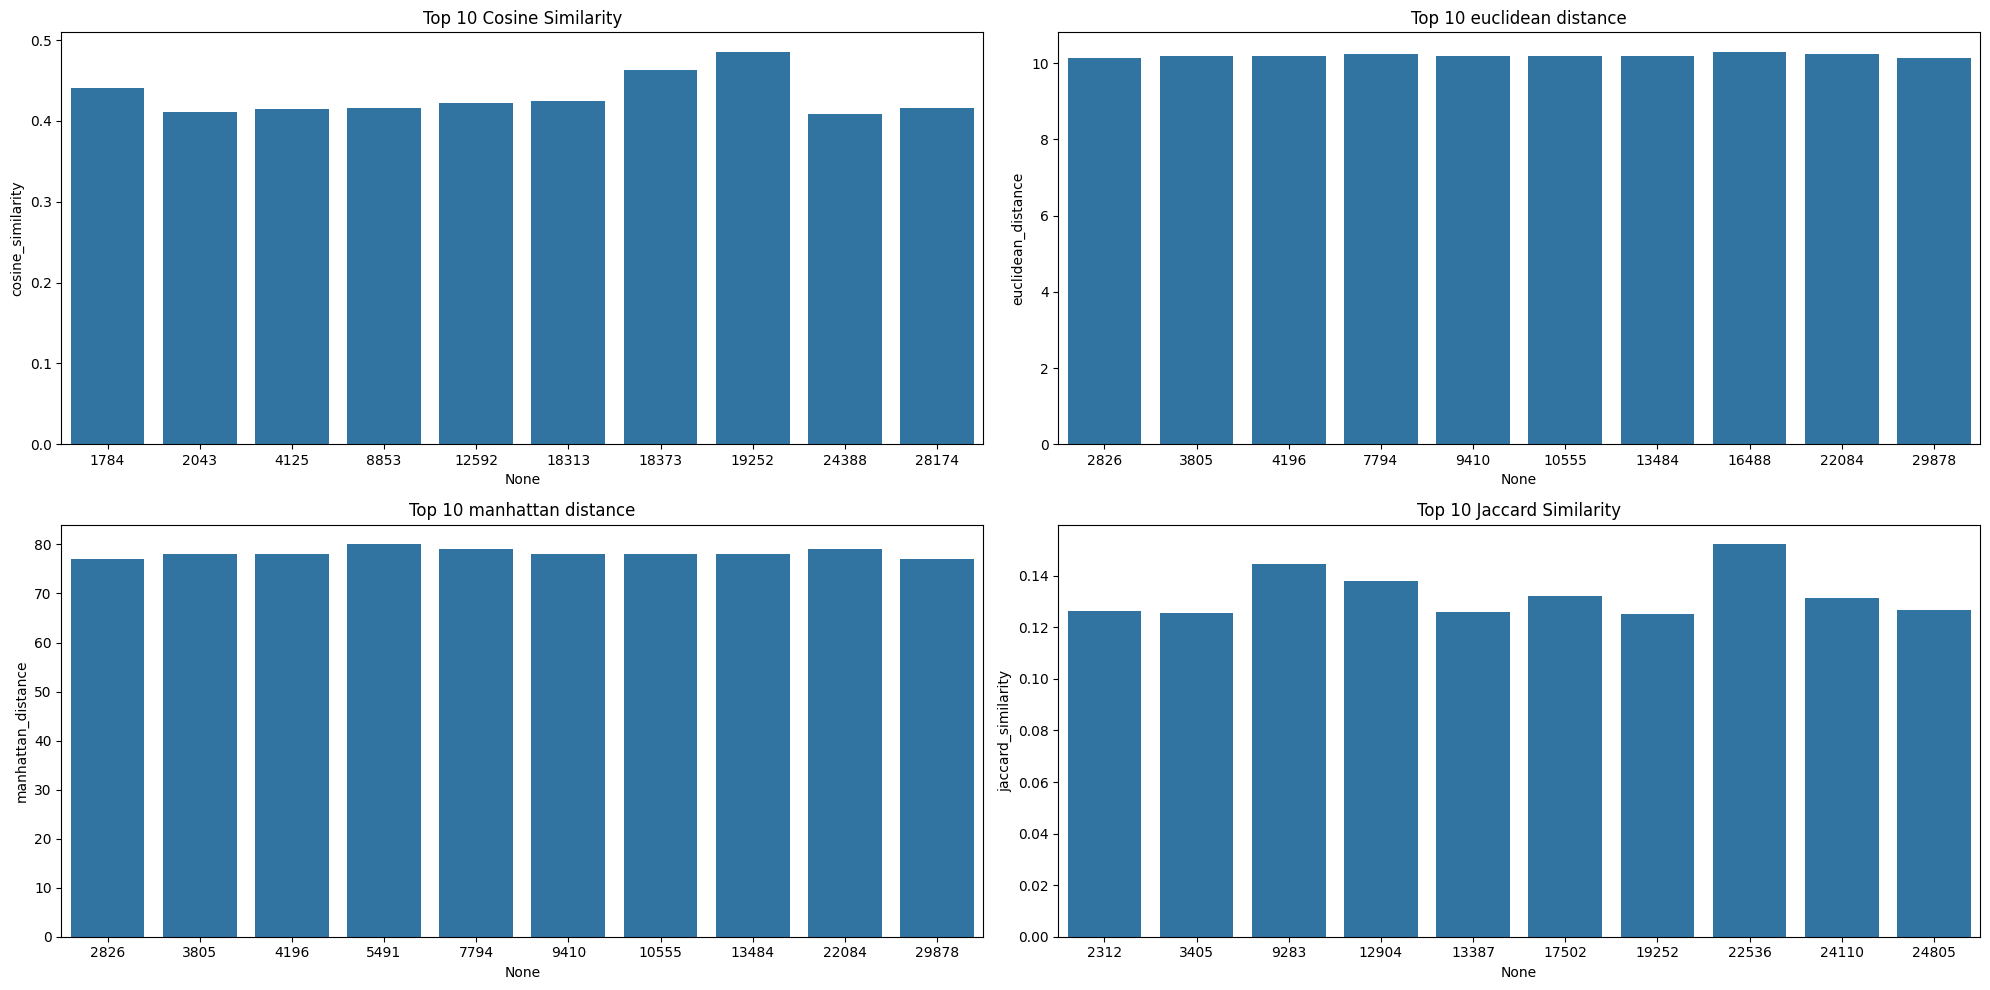

In [96]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

sns.barplot(ax=axes[0, 0], x=top_cosine.index, y=top_cosine["cosine_similarity"])
axes[0, 0].set_title("Top 10 Cosine Similarity")

sns.barplot(ax=axes[0, 1], x=top_euclidean.index, y=top_euclidean["euclidean_distance"])
axes[0, 1].set_title("Top 10 euclidean distance")

sns.barplot(ax=axes[1, 0], x=top_manhattan.index, y=top_manhattan["manhattan_distance"])
axes[1, 0].set_title("Top 10 manhattan distance")

sns.barplot(ax=axes[1, 1], x=top_jaccard.index, y=top_jaccard["jaccard_similarity"])
axes[1, 1].set_title("Top 10 Jaccard Similarity")

plt.tight_layout()
plt.show()

untuk cosine_similarity 10 besar berada di rentang 0.31-0.35

untuk jaccard_similarity 10 besar berada di rentang 0.07-0.09

karena kedua matriks semakin mendekati 1 semakin baik, dilihat sekilas cosine similarity lebih baik ketimbang jaccard similarity

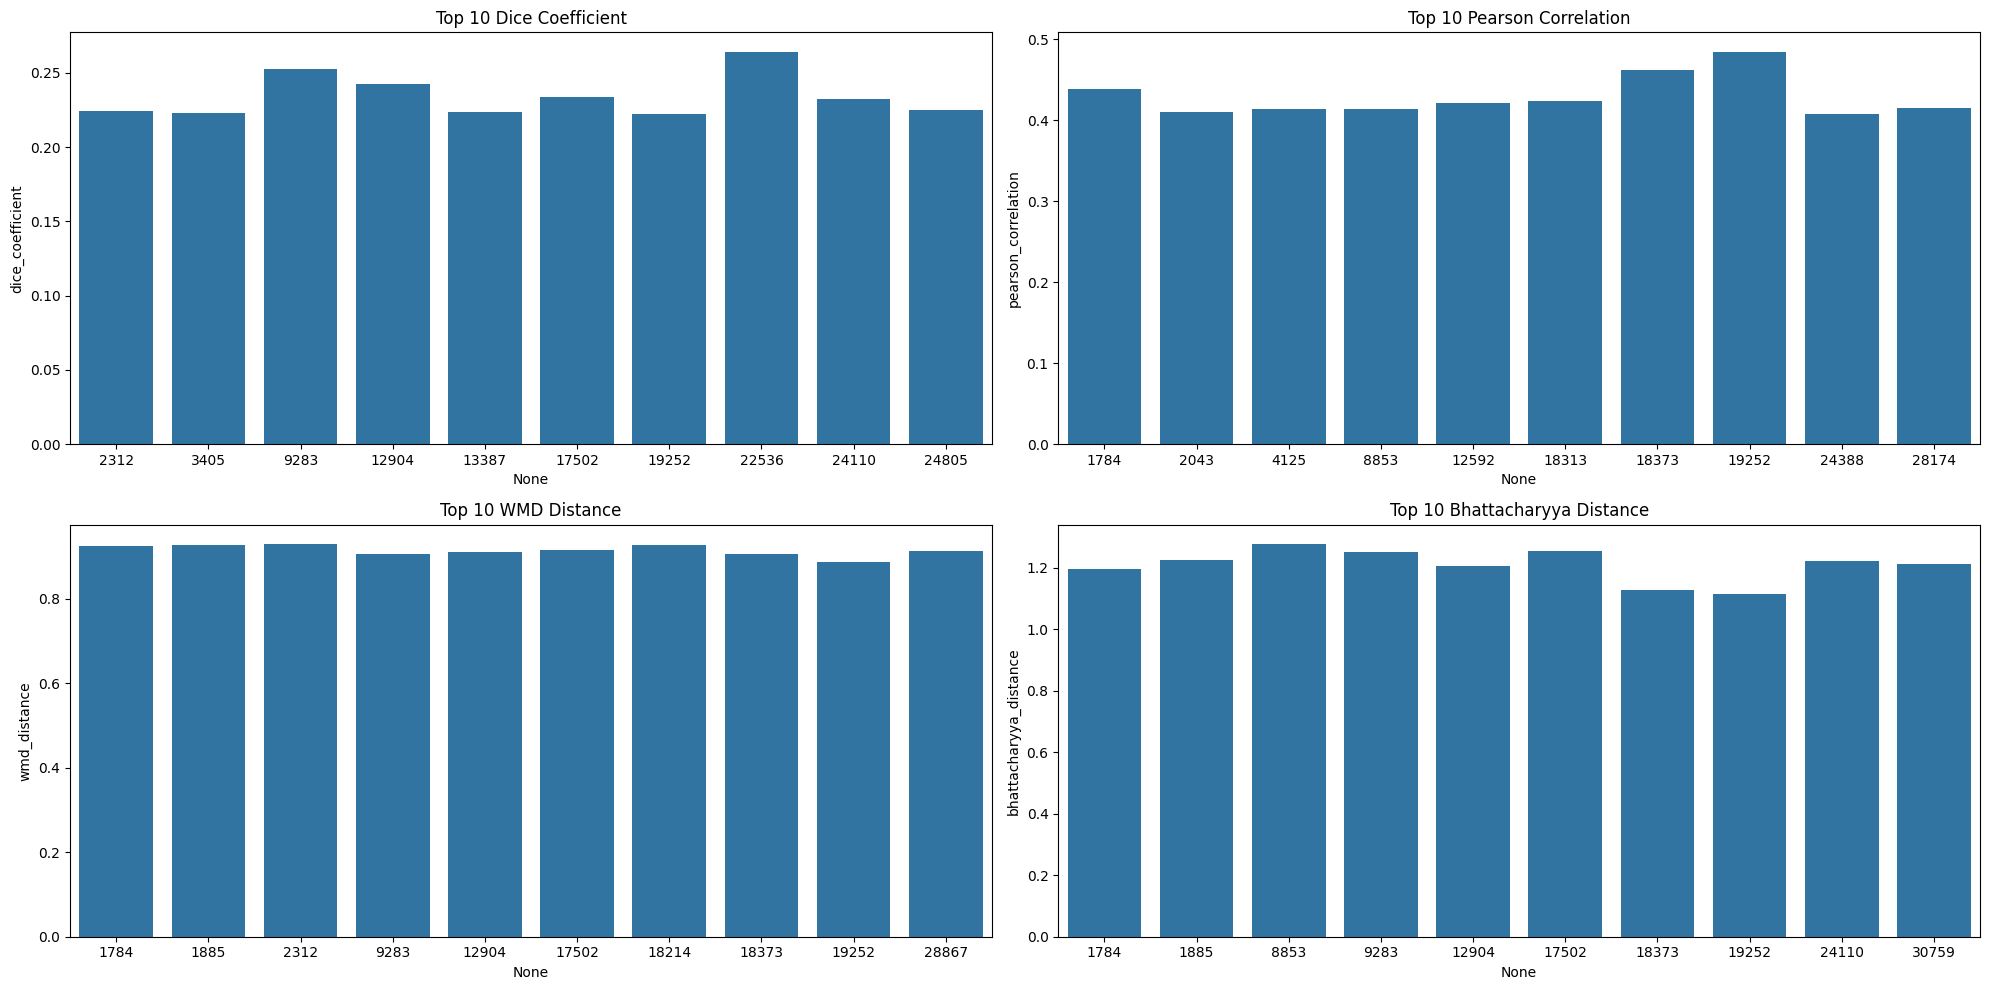

In [97]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

sns.barplot(ax=axes[0, 0], x=top_dice.index, y=top_dice["dice_coefficient"])
axes[0, 0].set_title("Top 10 Dice Coefficient")

sns.barplot(ax=axes[0, 1], x=top_pearson.index, y=top_pearson["pearson_correlation"])
axes[0, 1].set_title("Top 10 Pearson Correlation")

sns.barplot(ax=axes[1, 0], x=top_wmd.index, y=top_wmd["wmd_distance"])
axes[1, 0].set_title("Top 10 WMD Distance")

sns.barplot(ax=axes[1, 1], x=top_bhattacharyya.index, y=top_bhattacharyya["bhattacharyya_distance"])
axes[1, 1].set_title("Top 10 Bhattacharyya Distance")

plt.tight_layout()
plt.show()

malasssss analisssissnyaaaa

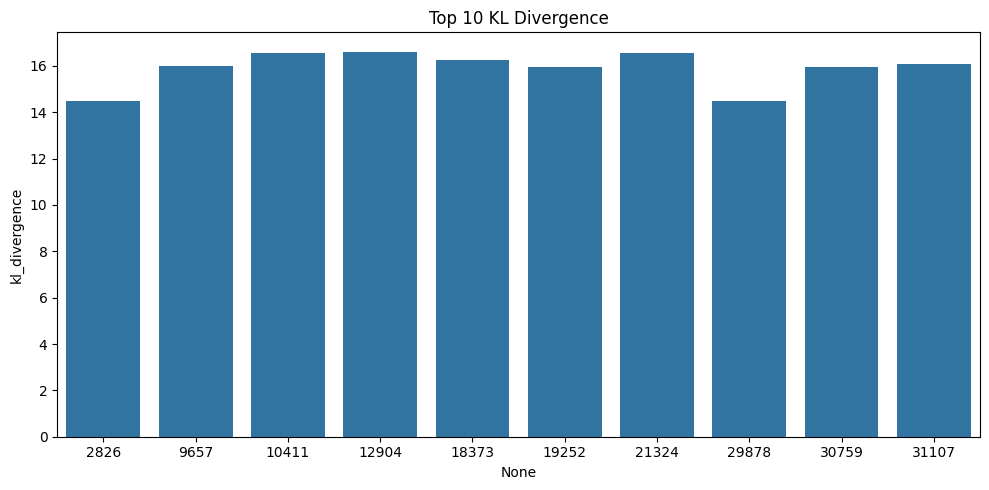

In [98]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

sns.barplot(ax=ax, x=top_kl.index, y=top_kl["kl_divergence"])
ax.set_title("Top 10 KL Divergence")

plt.tight_layout()
plt.show()

ntar tarik kesimpulan dan bandingkan kalau pakai model CountVectoraiser ini matriks mana yang paling bagus

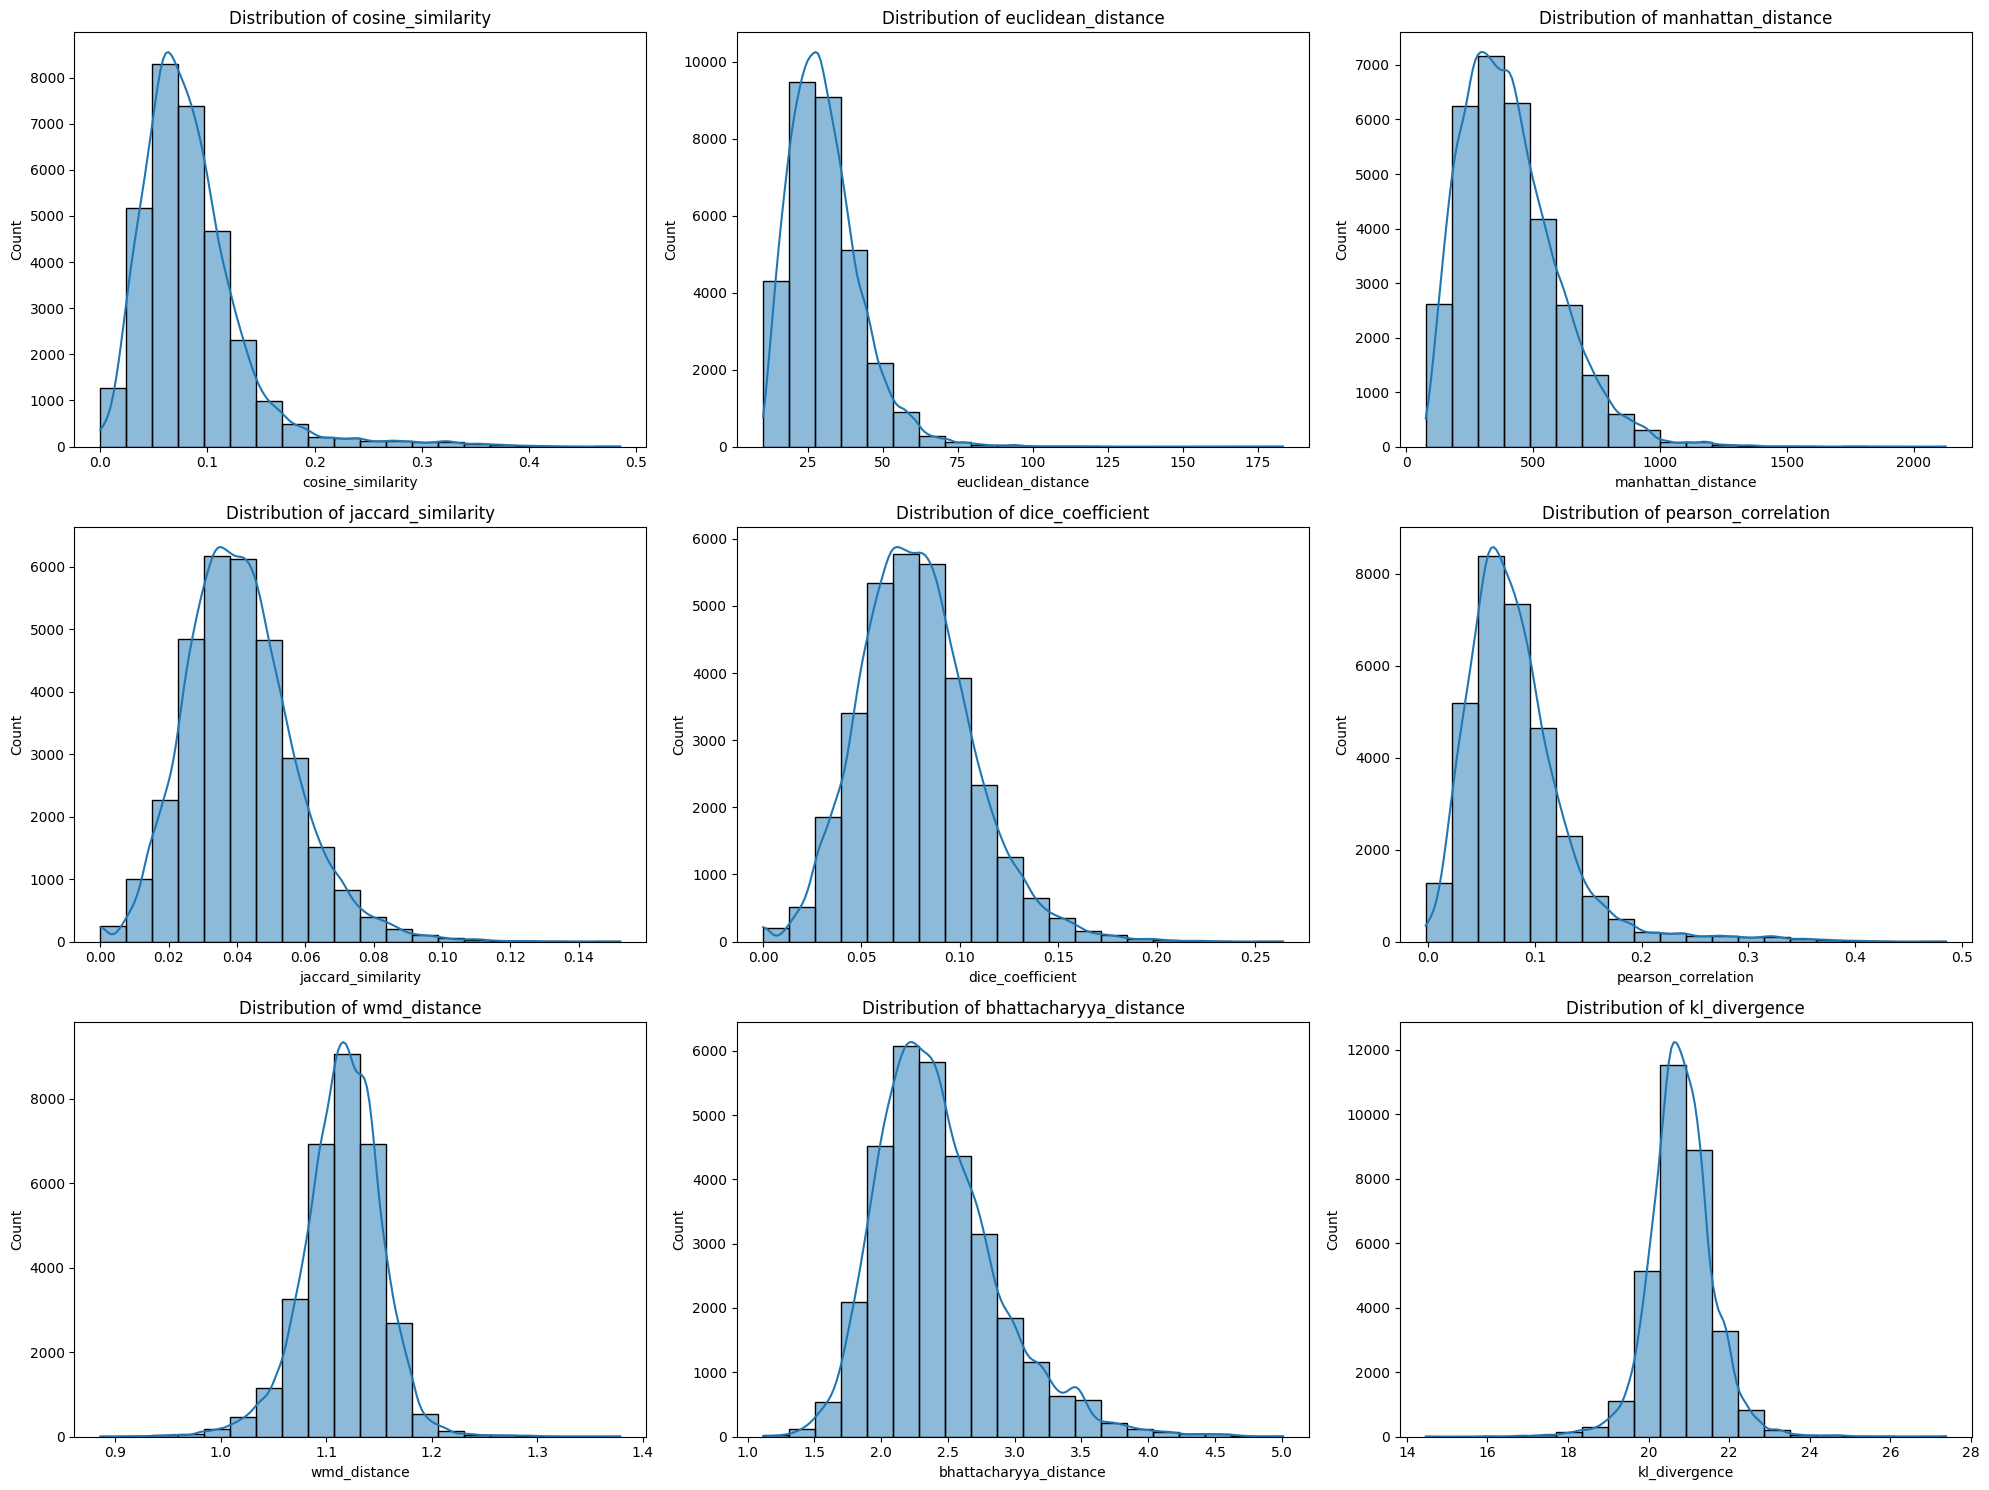

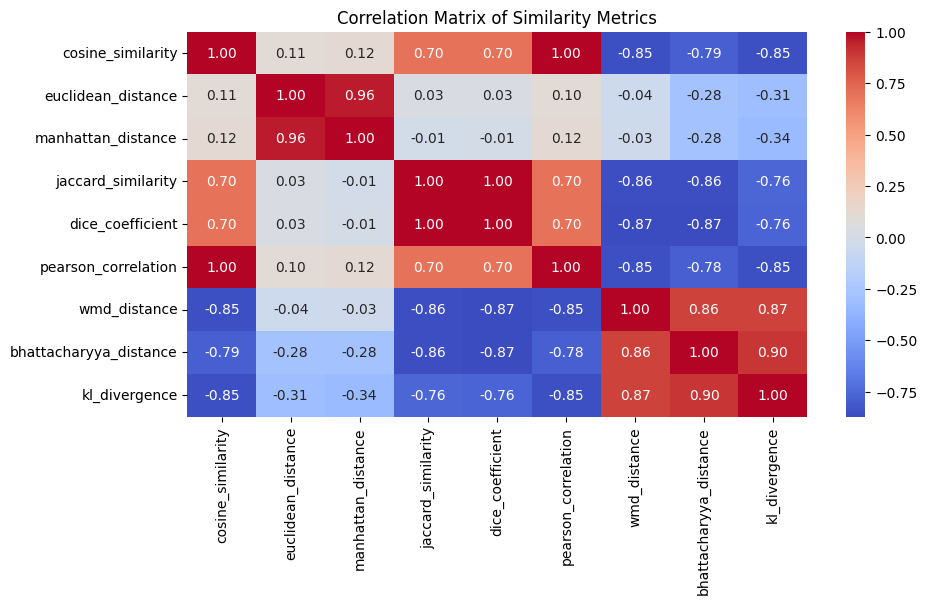

In [99]:
metrics = ['cosine_similarity', 'euclidean_distance', 'manhattan_distance', 'jaccard_similarity',
           'dice_coefficient', 'pearson_correlation', 'wmd_distance', 'bhattacharyya_distance',
           'kl_divergence']

plt.figure(figsize=(20, 15))
for i, metric in enumerate(metrics):
    plt.subplot(3, 3, i + 1)
    sns.histplot(dataset[metric], bins=20, kde=True)
    plt.title(f'Distribution of {metric}')
plt.tight_layout()
plt.show()

correlation_matrix = dataset[metrics].corr()
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Similarity Metrics')
plt.show()

In [100]:
"""from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

similarity_matrix = cosine_similarity(count_matrix[:-1])
kmeans = KMeans(n_clusters=5, random_state=42).fit(similarity_matrix)

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(similarity_matrix)

plt.figure(figsize=(10, 8))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('Clustering of Text Data Based on Cosine Similarity')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()"""

# kocak ngga mampu dia awowkwkwkw

"from sklearn.cluster import KMeans\nfrom sklearn.decomposition import PCA\n\nsimilarity_matrix = cosine_similarity(count_matrix[:-1])\nkmeans = KMeans(n_clusters=5, random_state=42).fit(similarity_matrix)\n\npca = PCA(n_components=2)\nreduced_data = pca.fit_transform(similarity_matrix)\n\nplt.figure(figsize=(10, 8))\nplt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_, cmap='viridis')\nplt.title('Clustering of Text Data Based on Cosine Similarity')\nplt.xlabel('PCA Component 1')\nplt.ylabel('PCA Component 2')\nplt.show()"